<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Read-data" data-toc-modified-id="Read-data-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Read data</a></span></li><li><span><a href="#Visualize" data-toc-modified-id="Visualize-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Visualize</a></span></li></ul></li><li><span><a href="#Method-1:-model-average-drift" data-toc-modified-id="Method-1:-model-average-drift-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Method 1: model average drift</a></span><ul class="toc-item"><li><span><a href="#Model-drift-using-n-datapoints-for-positive-and-negative-samples" data-toc-modified-id="Model-drift-using-n-datapoints-for-positive-and-negative-samples-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Model drift using n datapoints for positive and negative samples</a></span></li><li><span><a href="#Save-modelled-drift-values-for-all-future-time-points" data-toc-modified-id="Save-modelled-drift-values-for-all-future-time-points-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Save modelled drift values for all future time points</a></span></li><li><span><a href="#Subtract-modelled-drift-from-respective-dataset-at-appropriate-times" data-toc-modified-id="Subtract-modelled-drift-from-respective-dataset-at-appropriate-times-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Subtract modelled drift from respective dataset at appropriate times</a></span></li><li><span><a href="#How-good-was-the-curve-fitting?" data-toc-modified-id="How-good-was-the-curve-fitting?-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>How good was the curve fitting?</a></span></li><li><span><a href="#Compute-Standard-Deviations,-plot-difference" data-toc-modified-id="Compute-Standard-Deviations,-plot-difference-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Compute Standard Deviations, plot difference</a></span></li><li><span><a href="#Compare-to-temporal-algorithm" data-toc-modified-id="Compare-to-temporal-algorithm-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Compare to temporal algorithm</a></span></li></ul></li><li><span><a href="#Method-2:-model-individual-ISFET-drift" data-toc-modified-id="Method-2:-model-individual-ISFET-drift-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Method 2: model individual ISFET drift</a></span><ul class="toc-item"><li><span><a href="#Drift-modelled-and-predicted.-Now-subtract" data-toc-modified-id="Drift-modelled-and-predicted.-Now-subtract-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Drift modelled and predicted. Now subtract</a></span></li><li><span><a href="#How-good-was-curve-fitting?" data-toc-modified-id="How-good-was-curve-fitting?-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>How good was curve fitting?</a></span></li><li><span><a href="#Compute-Standard-Deviations,-plot-difference" data-toc-modified-id="Compute-Standard-Deviations,-plot-difference-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Compute Standard Deviations, plot difference</a></span></li></ul></li><li><span><a href="#Method-3:-difference-between-frames" data-toc-modified-id="Method-3:-difference-between-frames-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Method 3: difference between frames</a></span></li></ul></div>

In [875]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np
import math
import time
from scipy.signal import find_peaks

## Read data

In [1025]:
dataset = pd.read_csv('n1000t1f1pos.txt', header=None)

In [1026]:
dataset.shape

(4368, 2401)

In [1027]:
dataset.head()

0         1         2         3         4         5         6     \
0 -0.034604 -0.035852 -0.036520 -0.035558 -0.037478 -0.035933 -0.037856   
1 -0.035105 -0.037343 -0.036924 -0.036193 -0.036654 -0.037327 -0.037918   
2 -0.035277 -0.036378 -0.036826 -0.035589 -0.036766 -0.036514 -0.037465   
3 -0.035362 -0.036238 -0.036307 -0.037455 -0.036994 -0.037782 -0.037380   
4 -0.036367 -0.036193 -0.034888 -0.036637 -0.036638 -0.038290 -0.037264   

       7         8         9     ...      2391      2392      2393      2394  \
0 -0.038469 -0.036603 -0.037820  ... -0.123294 -0.122521 -0.121456 -0.122937   
1 -0.039011 -0.038531 -0.040127  ... -0.126039 -0.126465 -0.125384 -0.127944   
2 -0.037000 -0.036774 -0.038096  ... -0.118240 -0.118908 -0.118248 -0.117011   
3 -0.037831 -0.038763 -0.039260  ... -0.118938 -0.119610 -0.118518 -0.118179   
4 -0.037783 -0.038055 -0.037388  ... -0.124328 -0.124898 -0.123435 -0.125369   

       2395      2396      2397      2398      2399      2400  
0 -0.122874 -0.123223 -0.121422 -0.121972 -0.122339 -0.122057  
1 -0.126046 -0.126162 -0.127230 -0.126932 -0.126992 -0.126451  
2 -0.117921 -0.116919 -0.118818 -0.118118 -0.117901 -0.117675  
3 -0.117973 -0.119262 -0.117539 -0.118008 -0.118442 -0.119385  
4 -0.125553 -0.123882 -0.124578 -0.124055 -0.126434 -0.125610  

[5 rows x 2401 columns]

## Visualize

In [906]:
t = list(range(2401))

 ...]

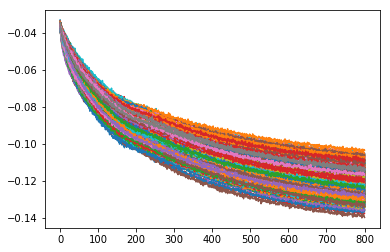

In [882]:
plt.plot(t, dataset.T)

# Method 1: model average drift

## Model drift using n datapoints for positive and negative samples

In [1028]:
n = 300

In [1030]:
dataset_neg = pd.read_csv('n1000t1f1neg.txt', header=None)

In [966]:
data_for_fit_pos = dataset.iloc[:, :n]
data_for_fit_neg = dataset_neg.iloc[:, :n]

In [967]:
def drift(x,q,beta,tau):
    return (1-np.exp(((x/tau)**beta)*-1))*q

In [968]:
time_for_fit = np.arange(n)[1:]

In [969]:
ydata_pos = data_for_fit_pos.mean().values[1:]
ydata_neg = data_for_fit_neg.mean().values[1:]

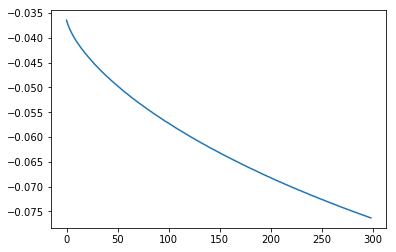

In [970]:
plt.plot(ydata_pos)

In [971]:
popt_pos,_ = curve_fit(drift, time_for_fit, ydata_pos, bounds = ((-1, 0, 500),(0,2,10000)))
popt_neg,_ = curve_fit(drift, time_for_fit, ydata_neg, bounds = ((-1, 0, 500),(0,2,10000)))

In [972]:
print(popt_pos)
print(popt_neg)

[-2.12343457e-01  2.43171722e-01  1.00000000e+04]
[-2.65174748e-01  4.56676062e-01  9.99996117e+03]


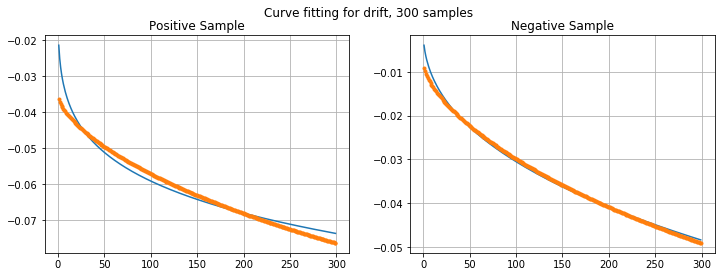

In [973]:
fig,ax = plt.subplots(1,2, figsize=(12,4))

ax[0].plot(time_for_fit, drift(time_for_fit, *popt_pos))
ax[0].plot(time_for_fit, ydata_pos, '.')
ax[0].set_title('Positive Sample')
ax[0].grid(which='both')

ax[1].plot(time_for_fit, drift(time_for_fit, *popt_neg))
ax[1].plot(time_for_fit, ydata_neg, '.')
ax[1].set_title('Negative Sample')
ax[1].grid(which='both')

titlestr = "Curve fitting for drift, " + str(n) + " samples"
fig.suptitle(titlestr)
plt.show()

## Save modelled drift values for all future time points

In [974]:
remaining_time_points = np.arange(n, 2401)

In [975]:
drift_modelled_pos = drift(remaining_time_points, *popt_pos)
drift_modelled_neg = drift(remaining_time_points, *popt_neg)

## Subtract modelled drift from respective dataset at appropriate times

In [976]:
pos_no_drift = dataset.iloc[:, n:] - drift_modelled_pos
neg_no_drift = dataset_neg.iloc[:, n:] - drift_modelled_neg

## How good was the curve fitting?

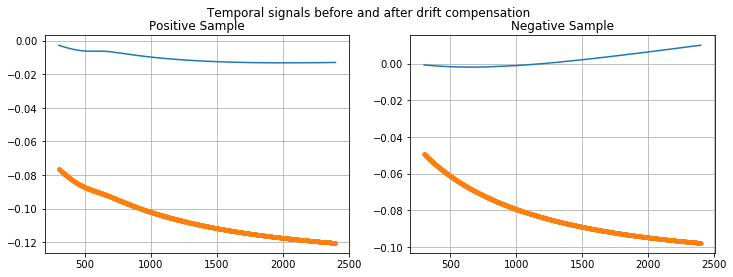

In [977]:
fig,ax = plt.subplots(1,2, figsize=(12,4))

ax[0].plot(remaining_time_points, pos_no_drift.mean())
ax[0].plot(remaining_time_points, dataset.iloc[:, n:].mean(), '.')
ax[0].set_title('Positive Sample')
ax[0].grid(which='both')

ax[1].plot(remaining_time_points, neg_no_drift.mean())
ax[1].plot(remaining_time_points, dataset_neg.iloc[:, n:].mean(), '.')
ax[1].set_title('Negative Sample')
ax[1].grid(which='both')

fig.suptitle('Temporal signals before and after drift compensation')
plt.show()

Text(0.5, 0.98, 'Spatial Signals Before and After Drift Compensation')

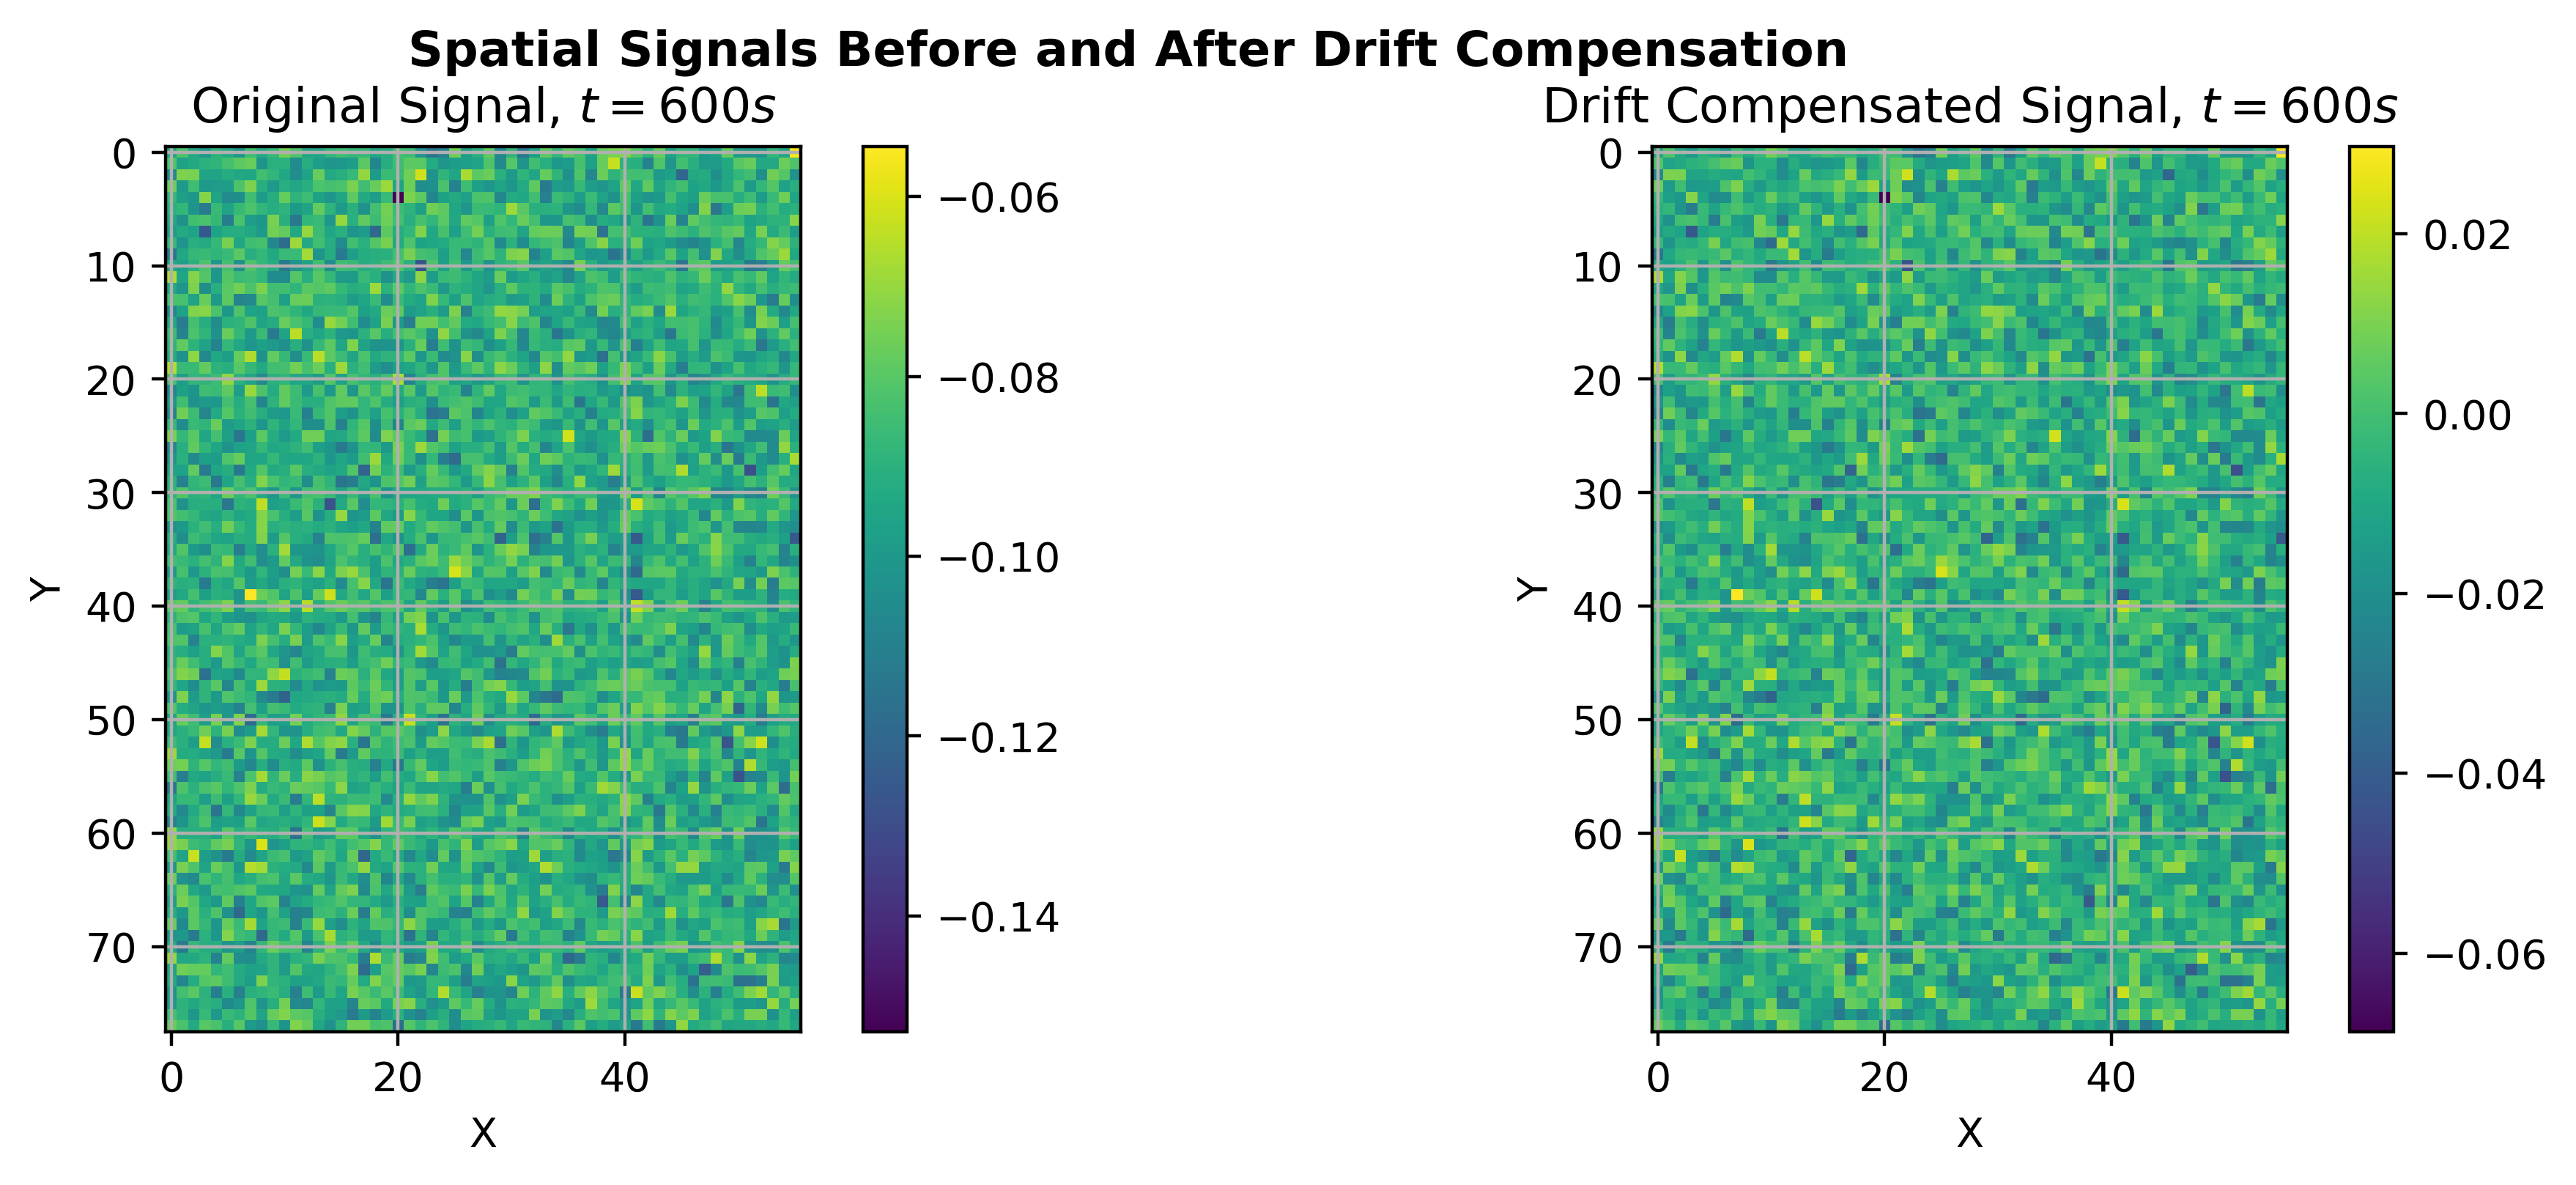

In [978]:
fig,ax = plt.subplots(1,2, figsize=(12,4), dpi=400)

im = ax[0].imshow(get_spatial_signal(dataset.iloc[:, 600]))
fig.colorbar(im, ax=ax[0])
ax[0].set_title('Original Signal, $t=600s$')
ax[0].grid(which='both')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')

im2 = ax[1].imshow(get_spatial_signal(pos_no_drift[600]))
fig.colorbar(im2, ax=ax[1])
ax[1].set_title('Drift Compensated Signal, $t=600s$')
ax[1].grid(which='both')
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')

fig.suptitle('Spatial Signals Before and After Drift Compensation', fontweight='bold')
#plt.savefig('Results/spatial_after_drift.png', bbox_inches='tight')

In [797]:
pos_no_drift[750]

0      -0.011681
1      -0.008981
2      -0.010935
3      -0.007873
4      -0.010283
5      -0.006002
6      -0.006174
7      -0.009016
8      -0.011474
9      -0.008096
10     -0.007364
11     -0.007919
12     -0.006707
13     -0.005294
14     -0.005228
15     -0.008534
16     -0.006542
17     -0.005824
18     -0.005748
19     -0.009788
20     -0.011867
21     -0.006955
22     -0.007569
23     -0.008009
24     -0.006959
25     -0.003821
26     -0.008092
27     -0.005334
28     -0.008622
29     -0.007562
          ...   
4338   -0.008238
4339   -0.004018
4340   -0.005314
4341   -0.008461
4342   -0.004443
4343   -0.008372
4344   -0.007084
4345   -0.008592
4346   -0.004906
4347   -0.007824
4348   -0.008544
4349   -0.009044
4350   -0.005768
4351   -0.010127
4352   -0.009148
4353   -0.009179
4354   -0.007702
4355   -0.006514
4356   -0.011024
4357   -0.008077
4358   -0.008426
4359   -0.008600
4360   -0.006995
4361   -0.007200
4362   -0.007343
4363   -0.005233
4364   -0.008397
4365   -0.0081

## Compute Standard Deviations, plot difference

In [979]:
std_pos_no_drift = np.std(pos_no_drift)
std_neg_no_drift = np.std(neg_no_drift)

Text(0.5, 1.0, 'Standard Deviation of Pixel Values vs Time (Positive Sample)')

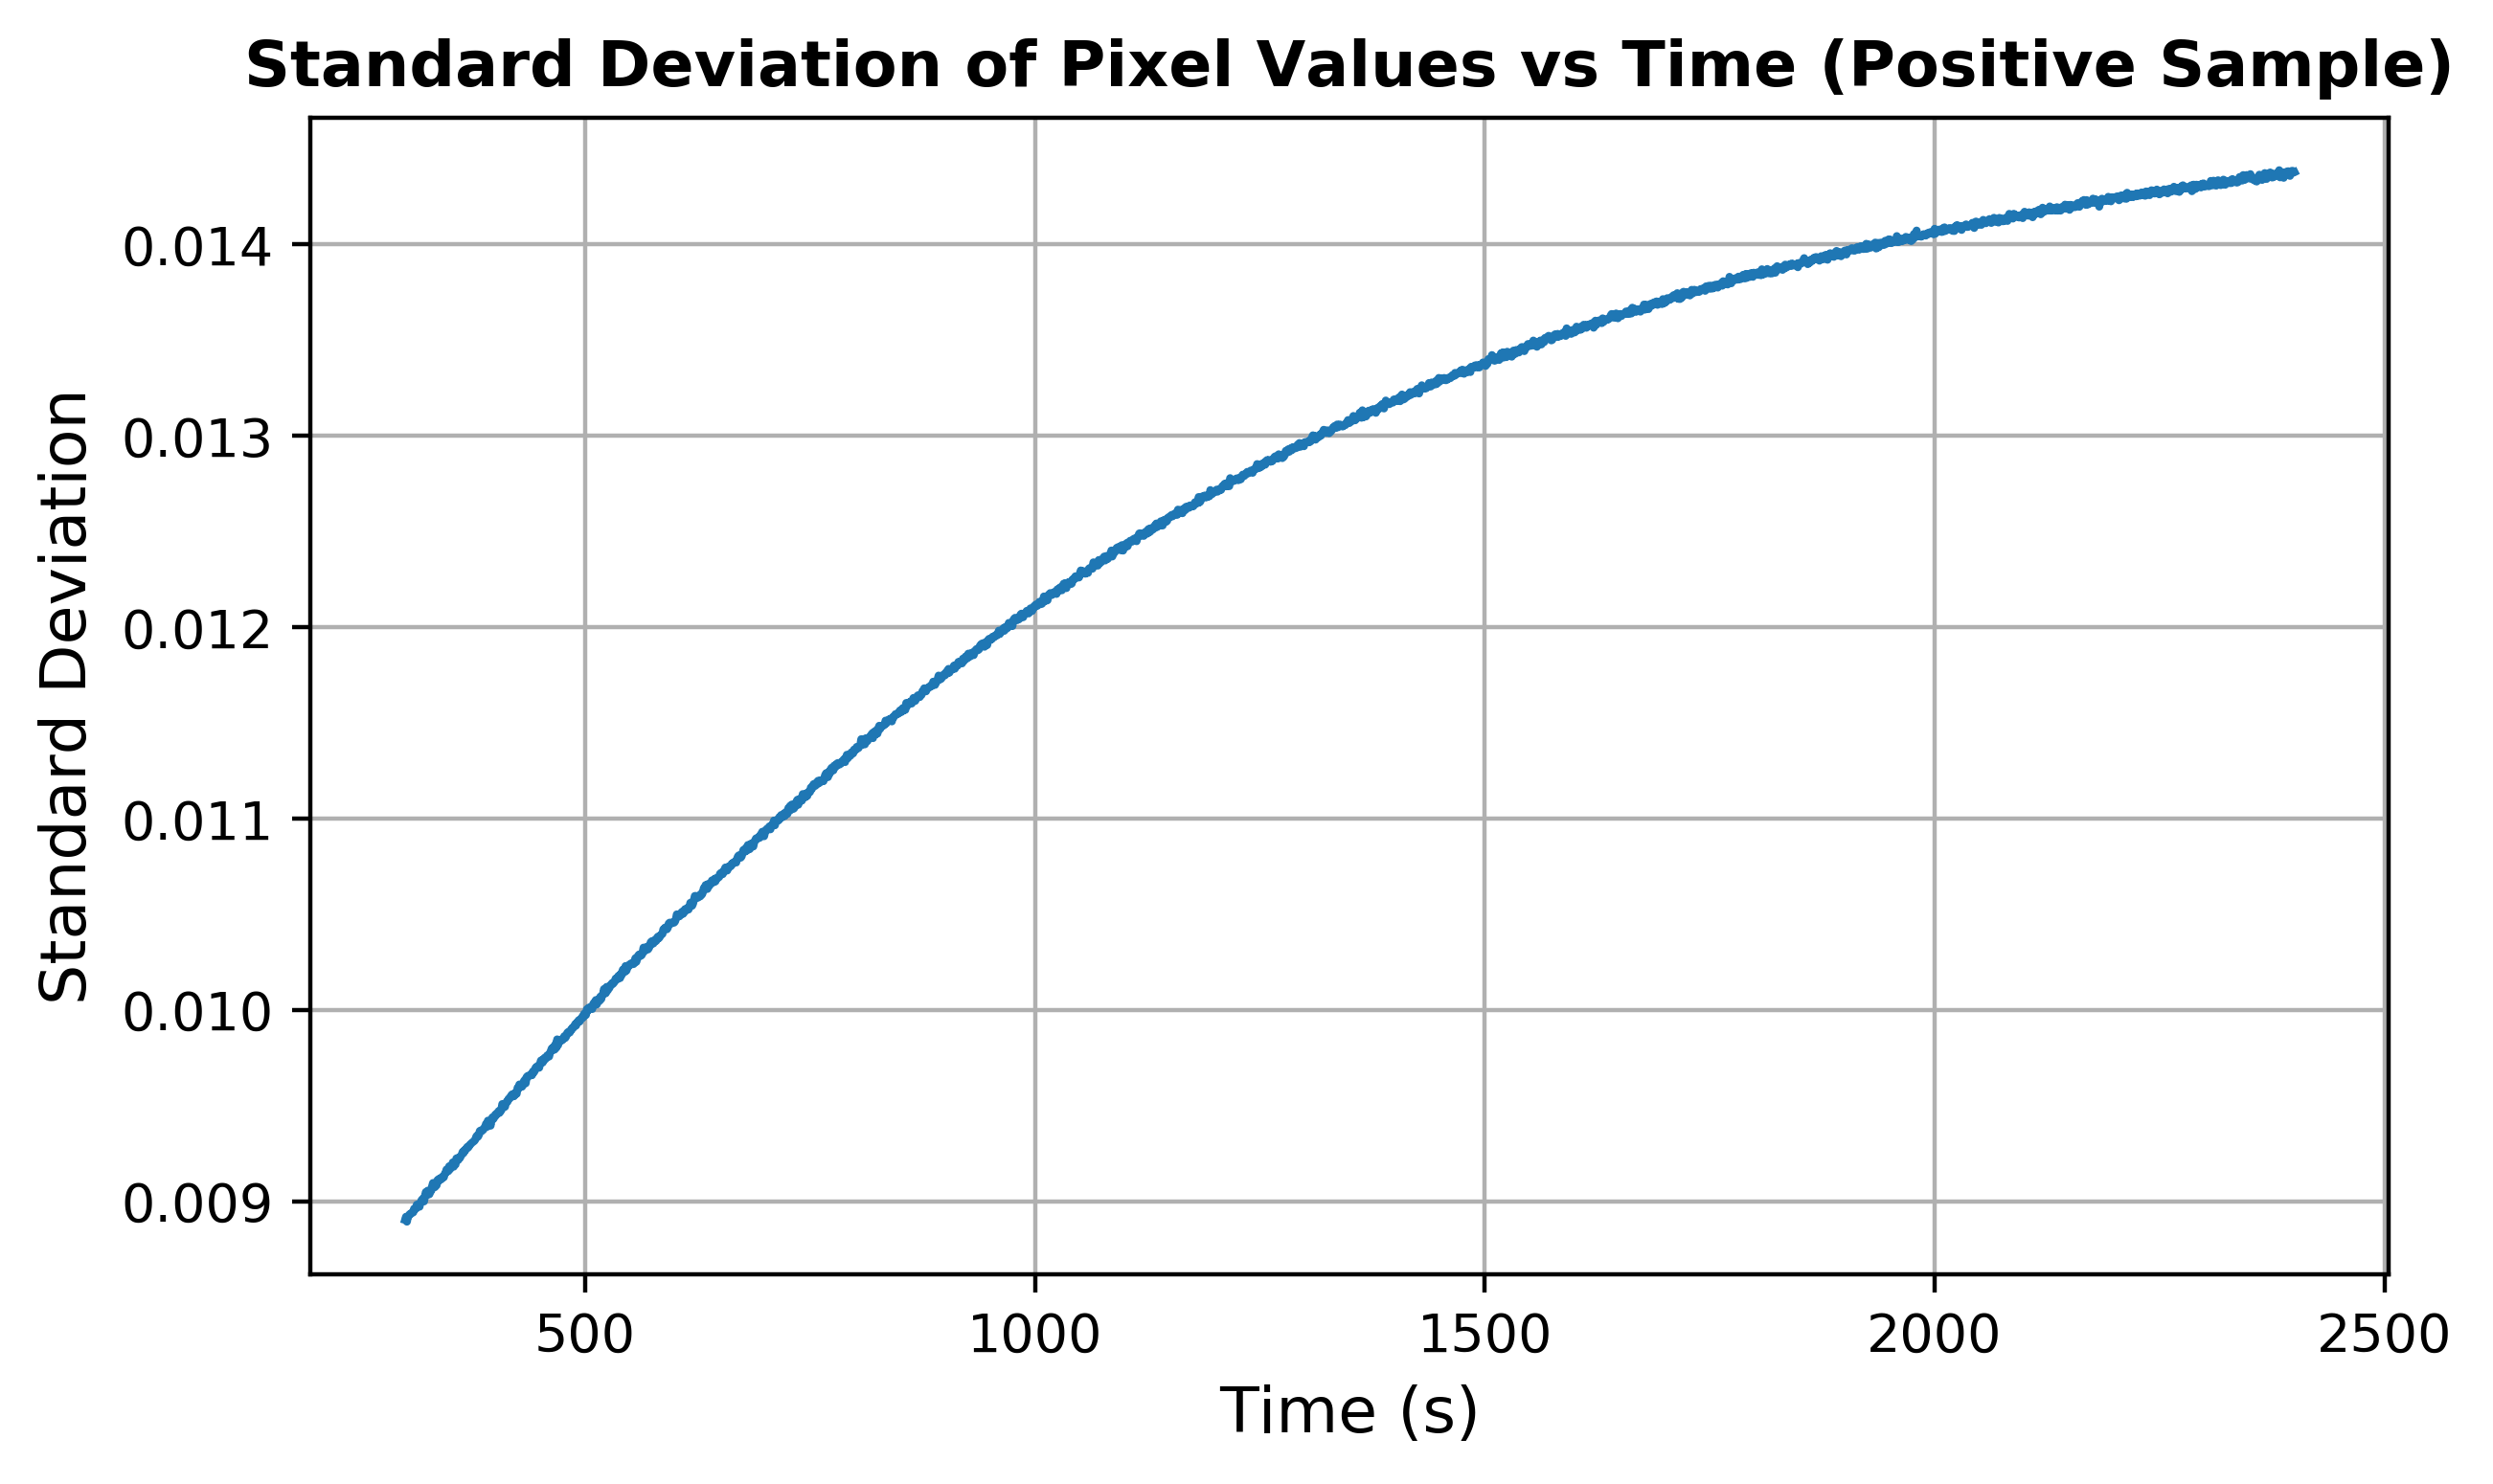

In [980]:
plt.figure(figsize=(7,4), dpi=400)

plt.ylabel('Standard Deviation', fontsize=12)
plt.xlabel('Time (s)', fontsize=12)
plt.grid(which="major", linestyle="-")
plt.grid(which="minor", linestyle="--")
plt.plot(remaining_time_points, std_pos_no_drift)
plt.title('Standard Deviation of Pixel Values vs Time (Positive Sample)', fontweight='bold')
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#plt.savefig('Results/std_dev_pos_noisy.png', bbox_inches='tight')

In [981]:
std_dev_diff = std_pos_no_drift - std_neg_no_drift

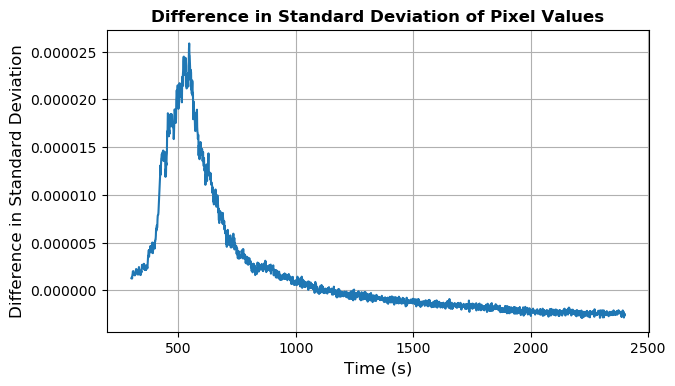

In [983]:
plt.figure(figsize=(7,4), dpi=100)

plt.ylabel('Difference in Standard Deviation', fontsize=12)
plt.xlabel('Time (s)', fontsize=12)
plt.grid(which="major", linestyle="-")
plt.grid(which="minor", linestyle="--")
plt.plot(remaining_time_points, std_dev_diff.rolling(1).mean())
plt.title('Difference in Standard Deviation of Pixel Values', fontweight='bold')
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.savefig('Results/std_dev_diff_noise.png', bbox_inches='tight')

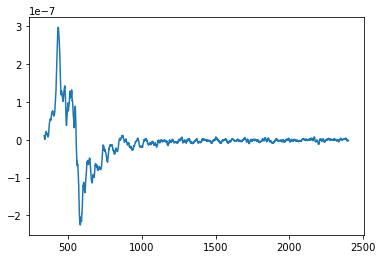

In [984]:
ds_dt = return_rolling_difference(std_dev_diff.rolling(10).mean().dropna().values)
n_steps_lost = len(remaining_time_points) - len(ds_dt)
ds_dt = np.append(np.zeros(n_steps_lost)+np.nan, ds_dt)
ds_dt = pd.Series(ds_dt)
plt.plot(remaining_time_points, ds_dt.rolling(30).mean())

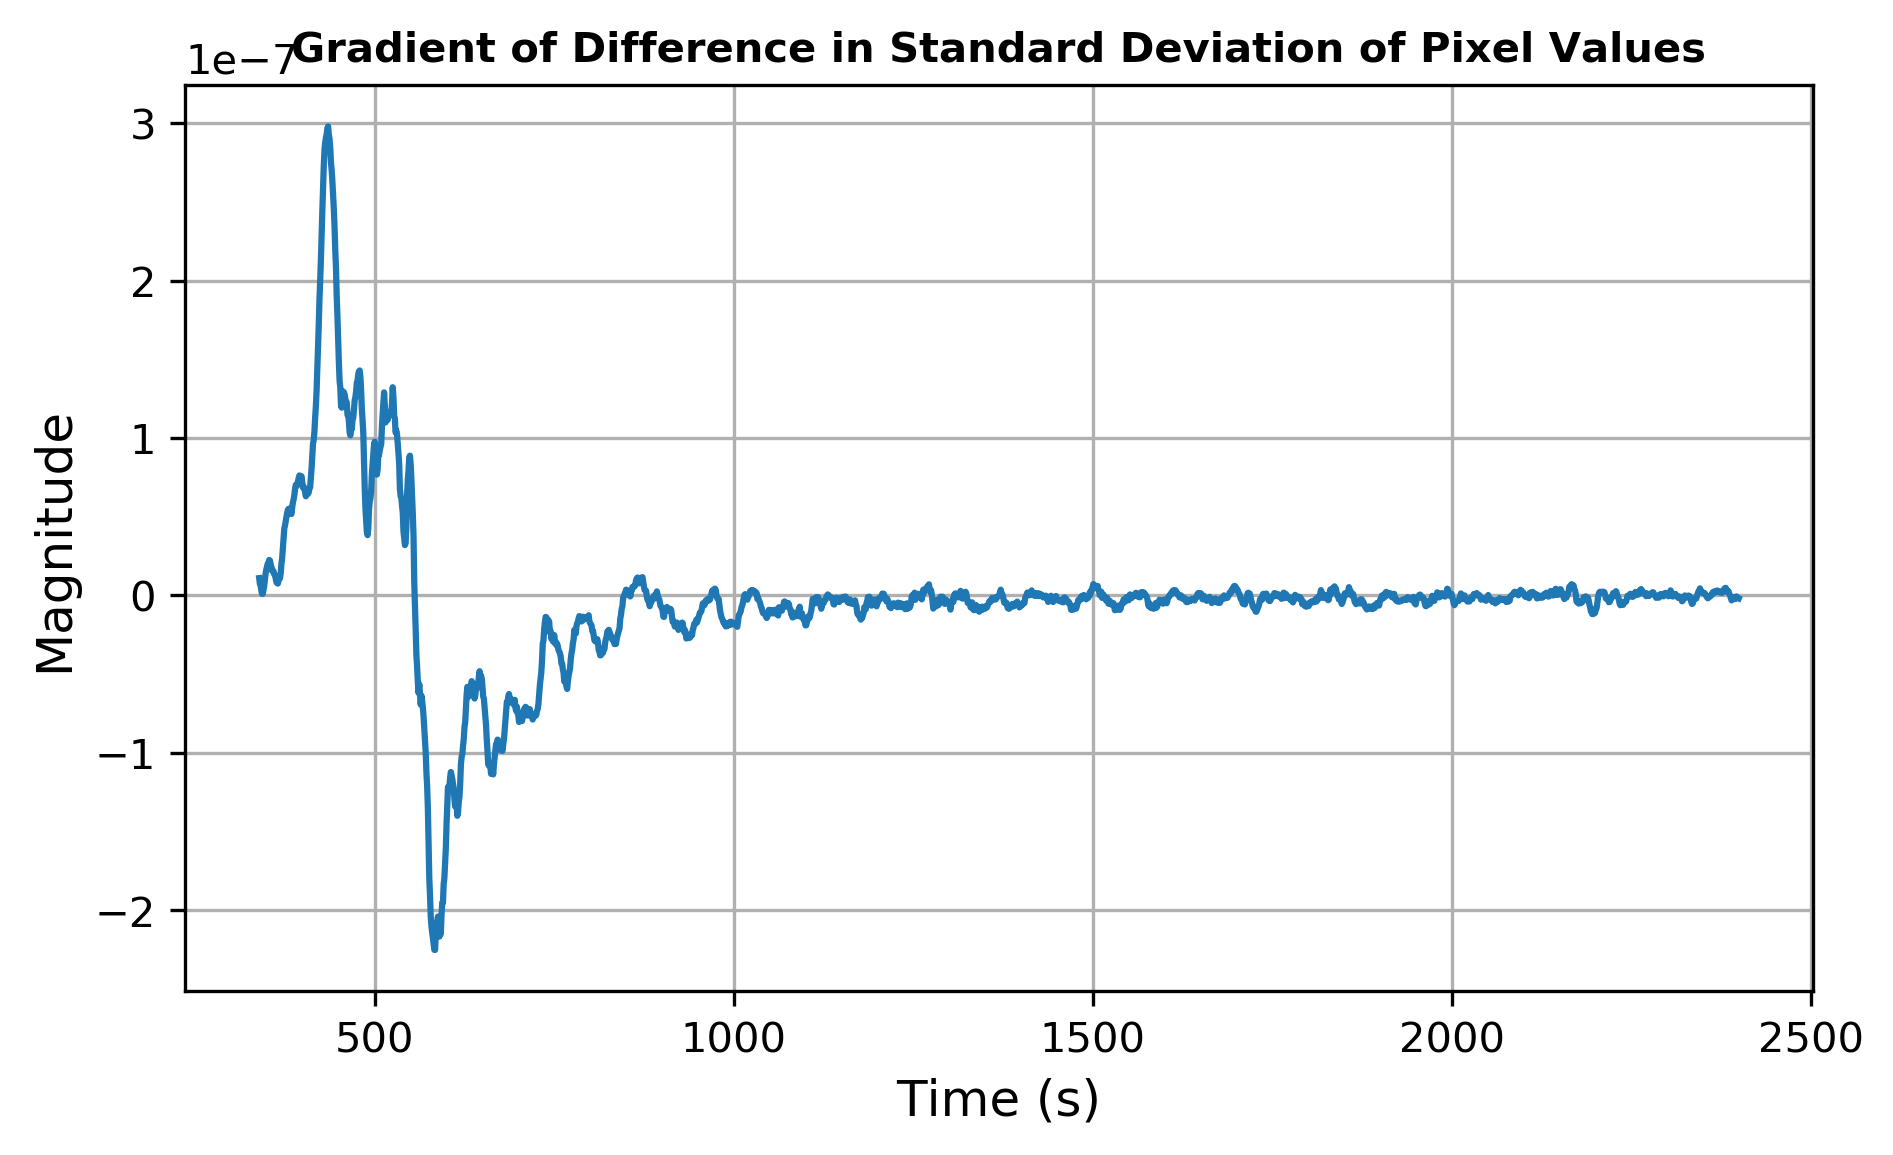

In [985]:
plt.figure(figsize=(7,4), dpi=300)

plt.ylabel('Magnitude', fontsize=12)
plt.xlabel('Time (s)', fontsize=12)
plt.grid(which="major", linestyle="-")
plt.grid(which="minor", linestyle="--")
plt.plot(remaining_time_points, ds_dt.rolling(30).mean())
plt.title('Gradient of Difference in Standard Deviation of Pixel Values', fontweight='bold', fontsize=10)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.savefig('Results/ds_dt_noisy.png', bbox_inches='tight')

In [870]:
ttp_spatial = np.where(ds_dt.rolling(30).mean()>0)[0][0]
print(ttp_spatial)
ttp_spatial = n + ttp_spatial
print(ttp_spatial)

40
340


In [933]:
peaks = find_peaks(dv_dt.rolling(30).mean(), distance = 200)
print(peaks)

(array([  84,  284,  632,  866, 1094, 1316, 1524, 1774, 2034]), {})


## Compare to temporal algorithm

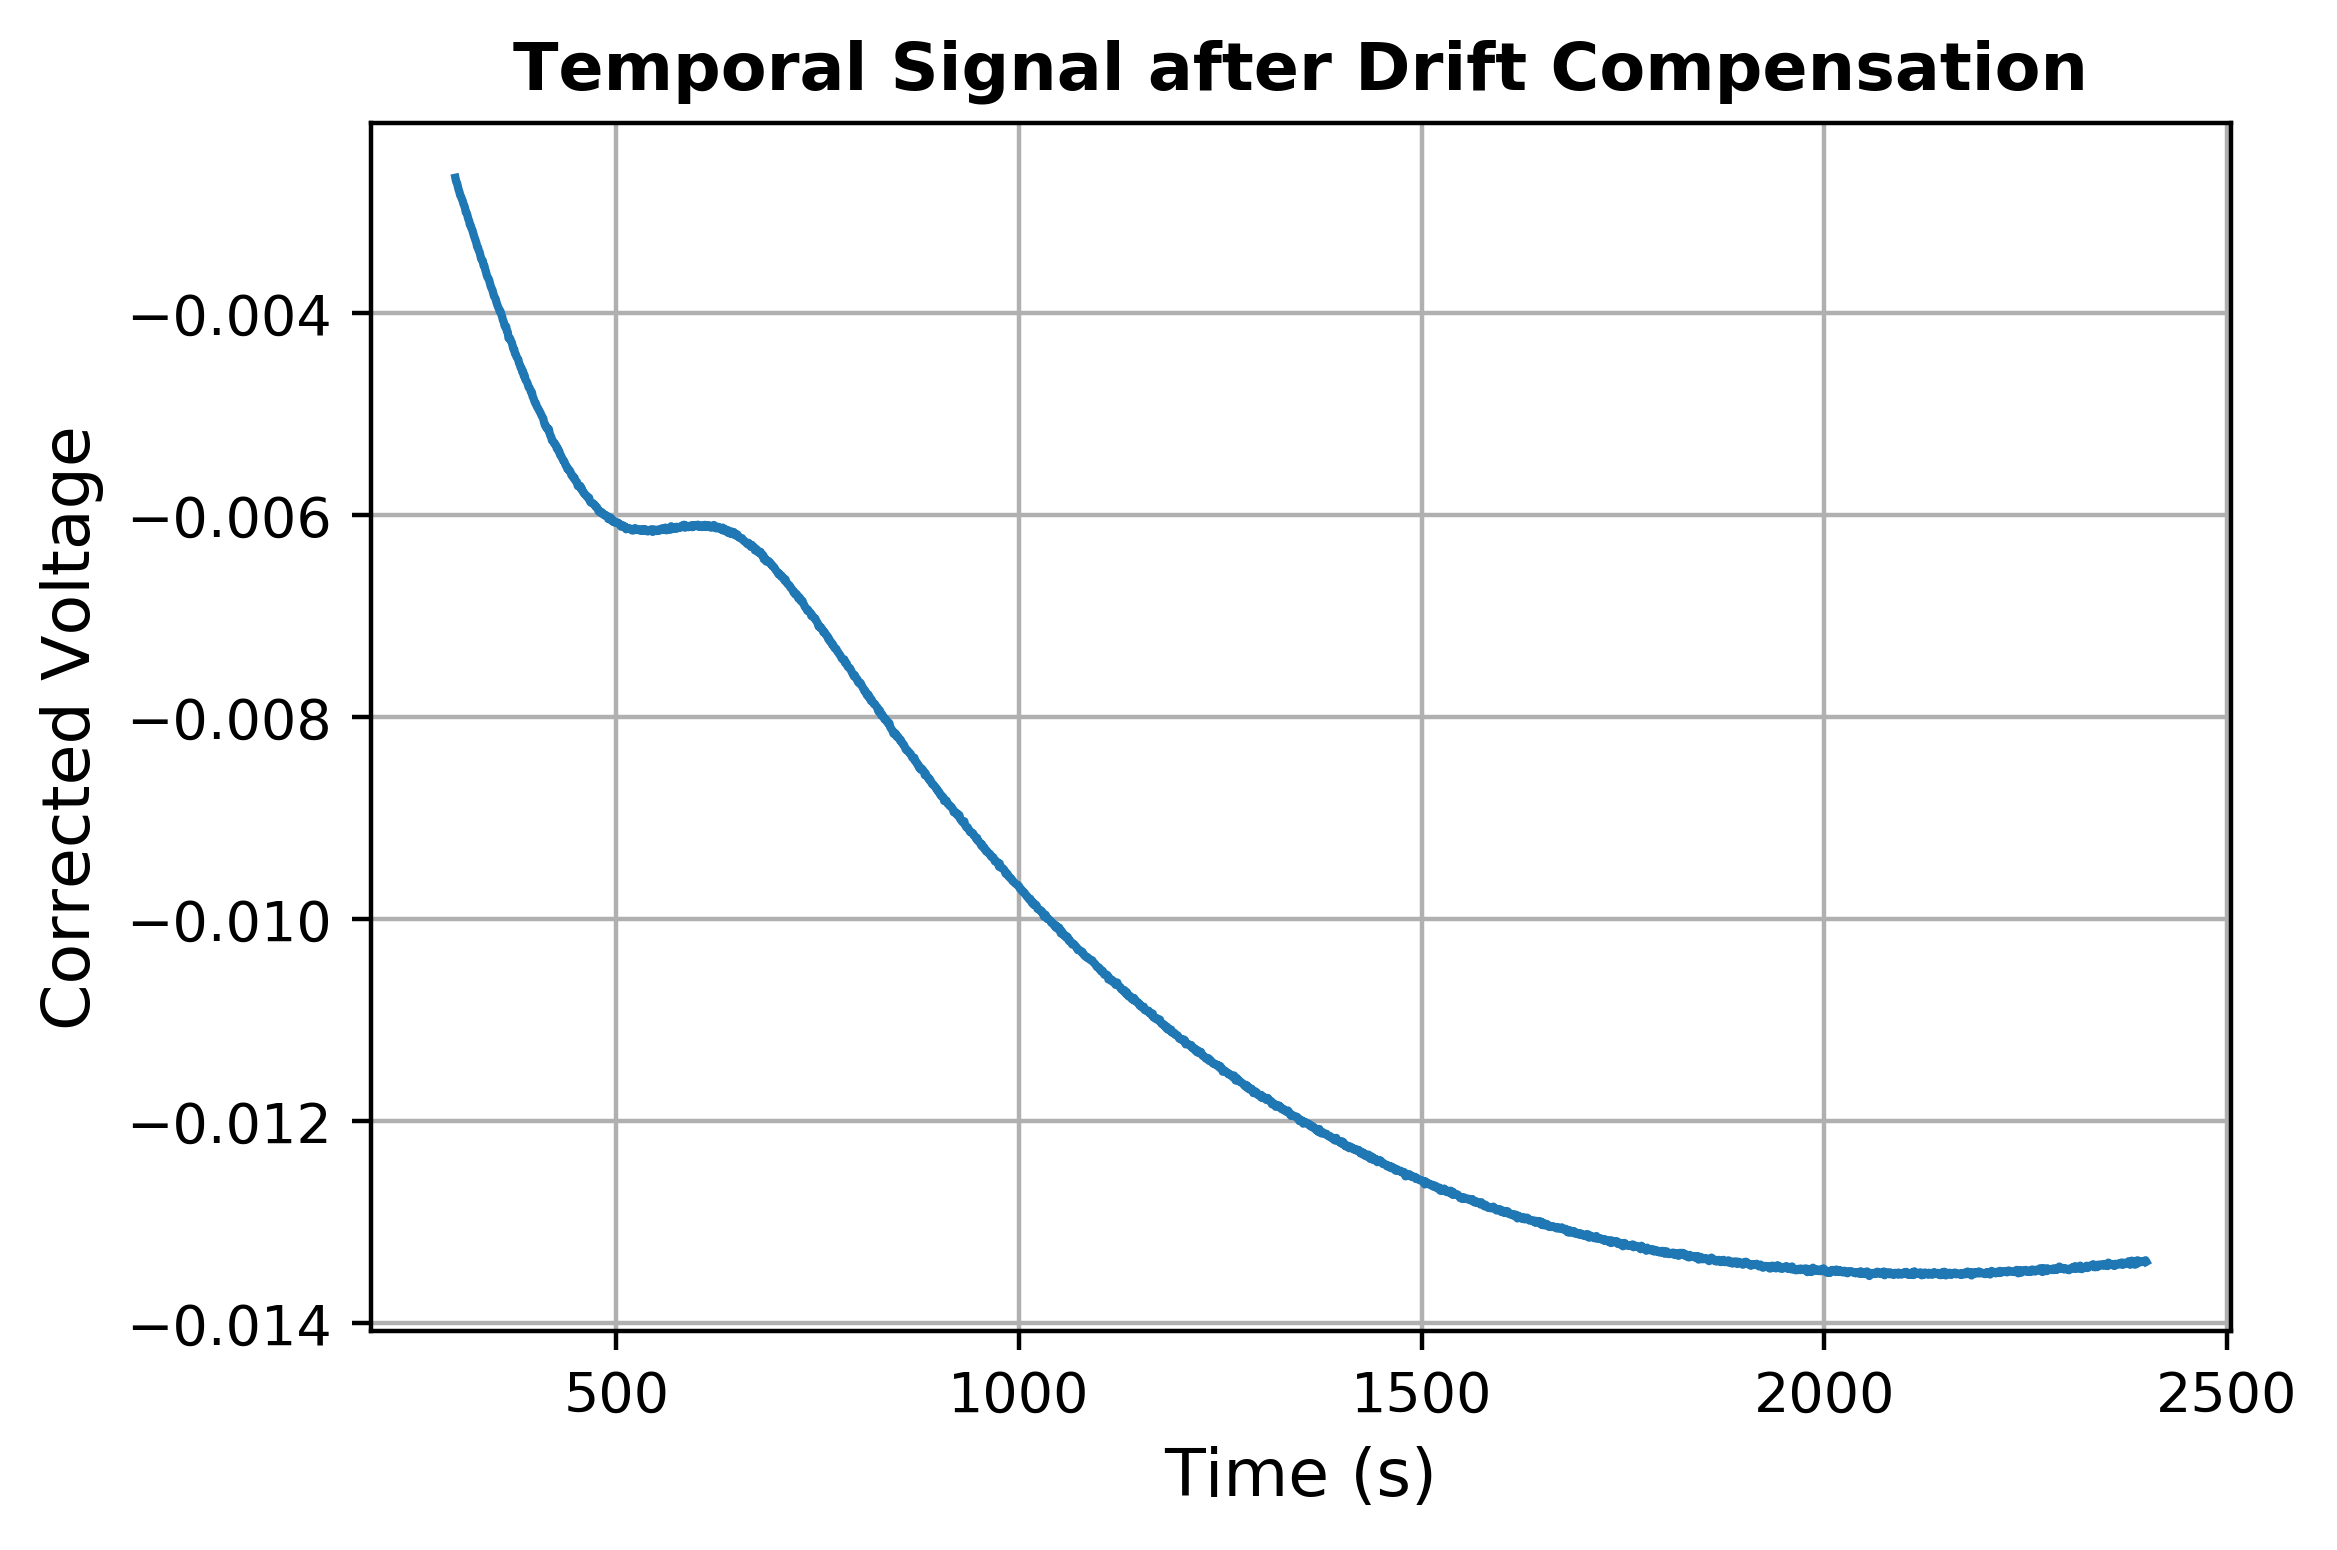

In [775]:
plt.figure(figsize=(6,4), dpi=400)

plt.ylabel('Corrected Voltage', fontsize=12)
plt.xlabel('Time (s)', fontsize=12)
plt.grid(which="major", linestyle="-")
plt.grid(which="minor", linestyle="--")
plt.plot(remaining_time_points, pos_no_drift.iloc[:,n:].mean())
plt.title('Temporal Signal after Drift Compensation', fontweight='bold')
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.savefig('Results/temporal_after_drift.png', bbox_inches='tight')

In [767]:
remaining_time_points

array([ 300,  301,  302, ..., 2398, 2399, 2400])

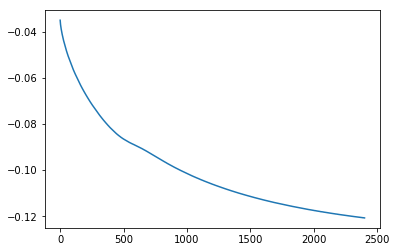

In [730]:
plt.plot(list(range(2401)), dataset.mean())

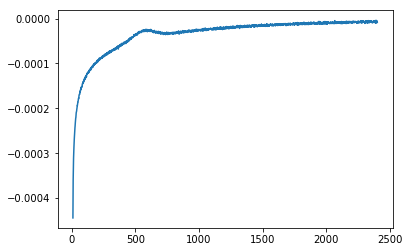

In [734]:
dv_dt = return_rolling_difference(dataset.mean().values)#.rolling(30).mean().dropna().values)
n_steps_lost = 2400 - len(dv_dt)
dv_dt = np.append(np.zeros(n_steps_lost)+np.nan, dv_dt)
dv_dt = pd.Series(dv_dt)
plt.plot(list(range(2400)), dv_dt.rolling(10).mean())

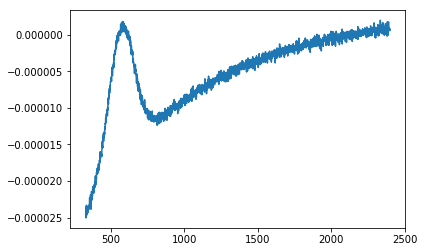

In [778]:
dv_dt = return_rolling_difference(pos_no_drift.iloc[:, 300:].mean().values)#.rolling(30).mean().dropna().values)
n_steps_lost = len(remaining_time_points) - len(dv_dt)
dv_dt = np.append(np.zeros(n_steps_lost)+np.nan, dv_dt)
dv_dt = pd.Series(dv_dt)
plt.plot(remaining_time_points, dv_dt.rolling(30).mean())

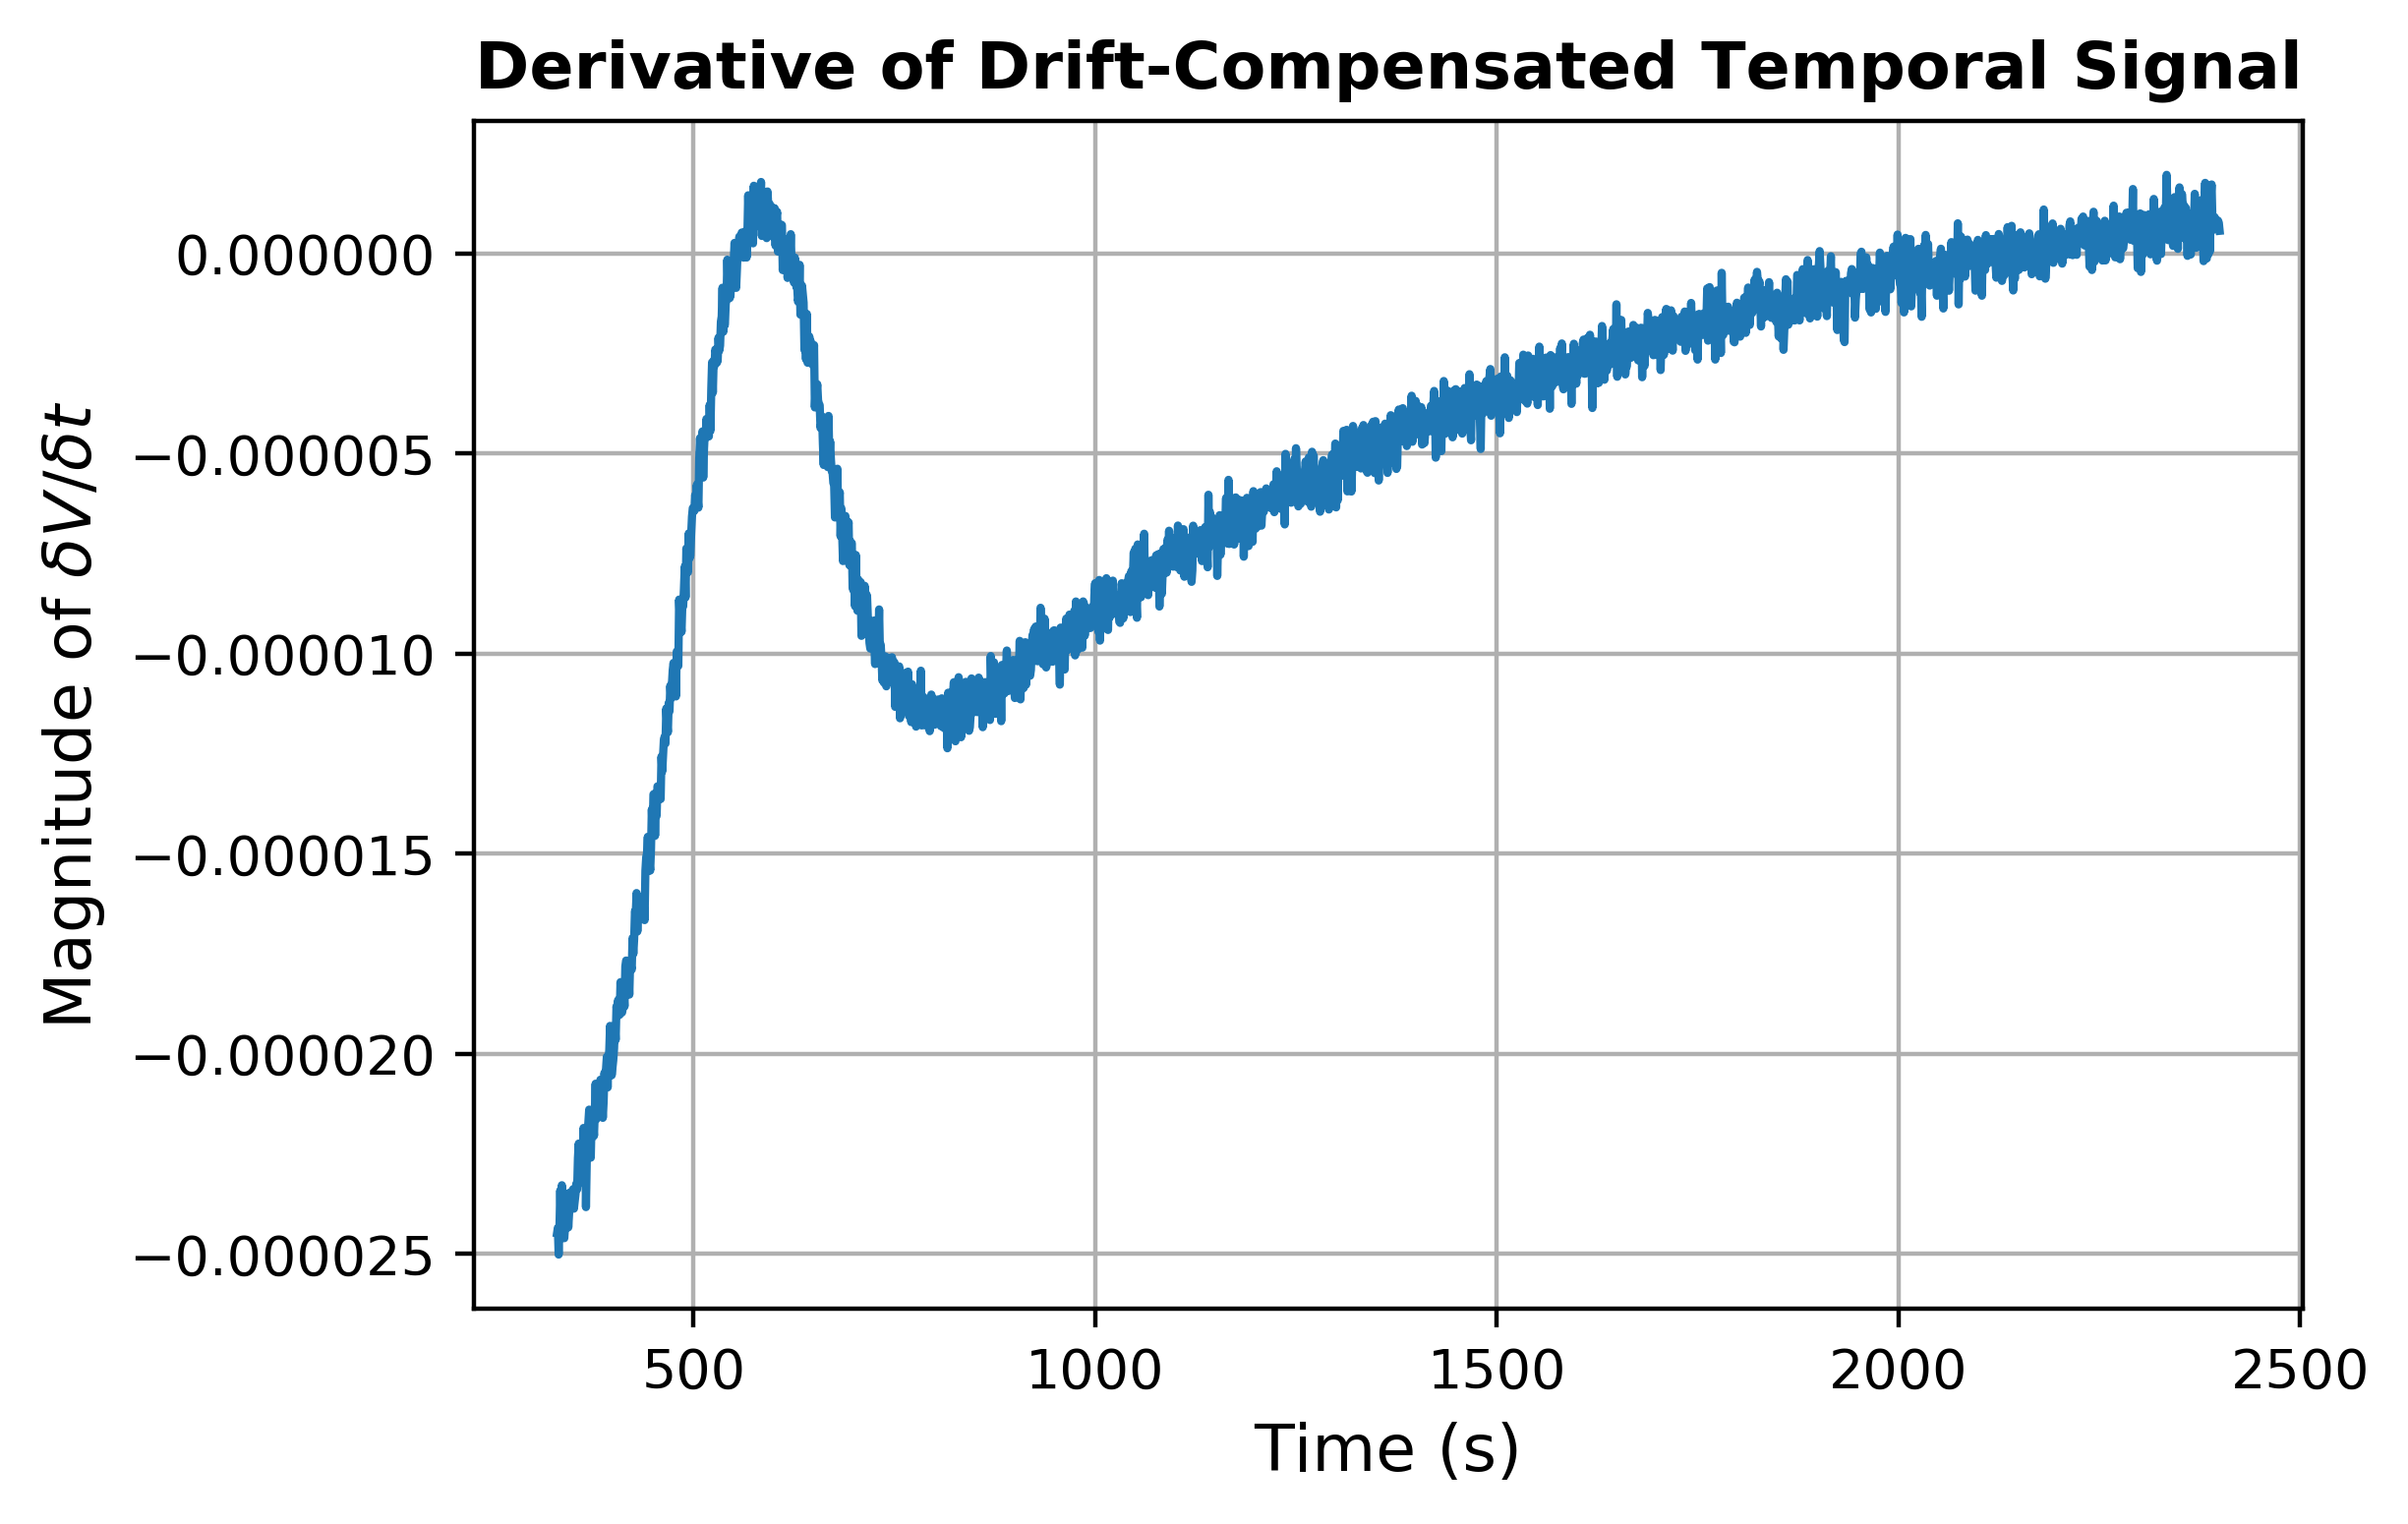

In [781]:
plt.figure(figsize=(6,4), dpi=400)
plt.ylabel('Magnitude of $\delta V/\delta t$', fontsize=12)
plt.xlabel('Time (s)', fontsize=12)
plt.grid(which="major", linestyle="-")
plt.grid(which="minor", linestyle="--")
plt.plot(remaining_time_points, dv_dt.rolling(30).mean())
plt.title('Derivative of Drift-Compensated Temporal Signal', fontweight='bold')
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.savefig('Results/derivative_temporal_after_drift.png', bbox_inches='tight')

In [484]:
ttp = np.where(dv_dt.rolling(30).mean()>0)[0][0]
print(ttp)
ttp_temporal = n + ttp
print(ttp_temporal)

251
551


In [788]:
peaks = find_peaks(dv_dt.rolling(50).mean(), distance = 300)
print(peaks)

(array([ 295,  790, 1103, 1417, 1734, 2054]), {})


In [784]:
ttp_temporal = n + peaks[0][0]
ttp_temporal

584

In [207]:
chip_y = 56
def view_spatial_signal(voltages):
    spatial_view = np.zeros((78,56))
    for i in range(0, chip_y):
        spatial_view[:,i] = voltages[(i)*78:(i)*78+78]
        
    fig,ax = plt.subplots()
    im = ax.imshow(spatial_view)
    fig.colorbar(im, ax=ax)
    plt.show()
    

In [789]:
def get_spatial_signal(voltages):
    spatial_view = np.zeros((78,56))
    for i in range(0, chip_y):
        spatial_view[:,i] = voltages[(i)*78:(i)*78+78]
    return spatial_view

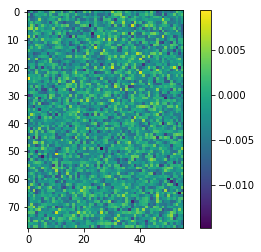

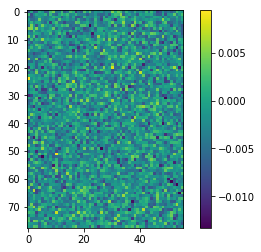

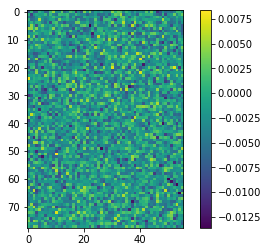

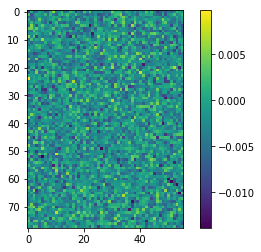

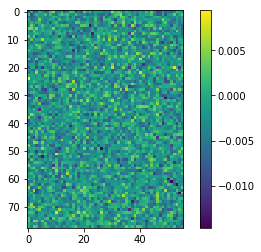

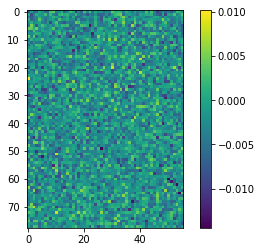

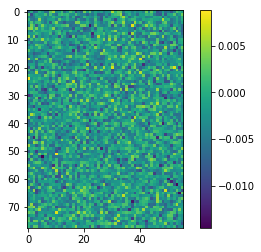

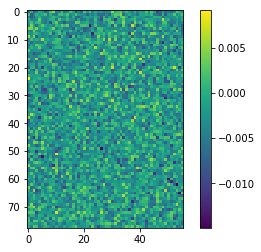

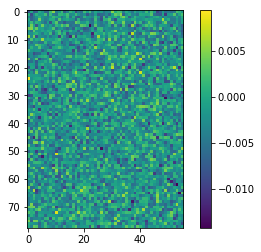

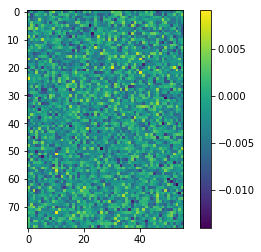

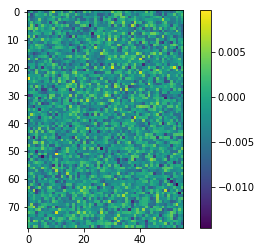

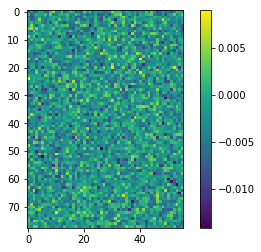

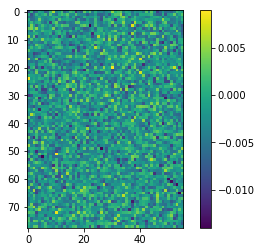

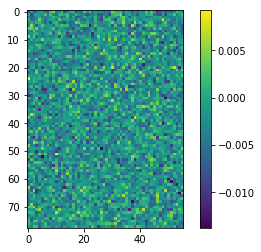

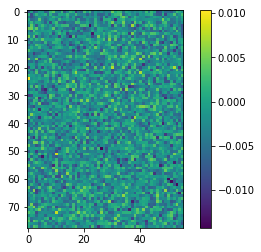

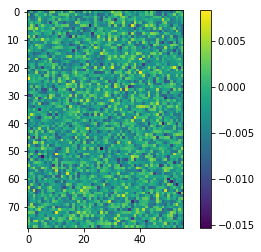

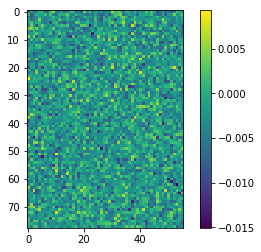

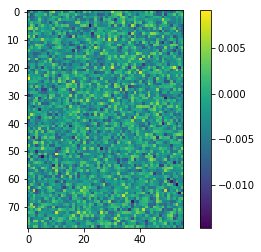

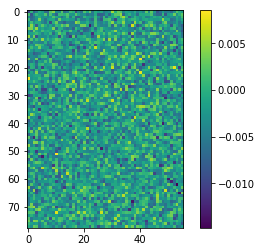

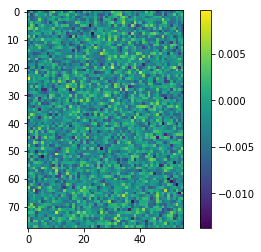

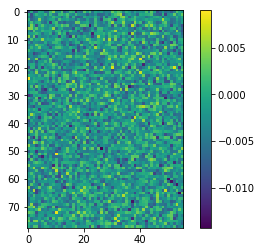

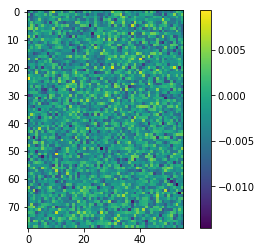

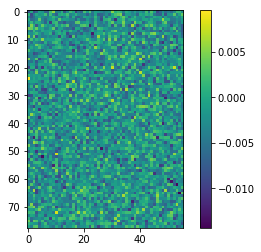

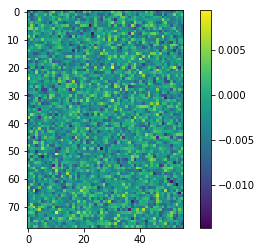

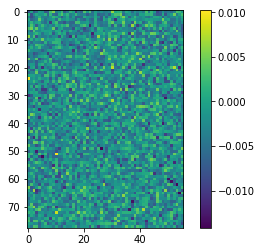

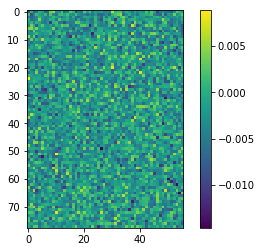

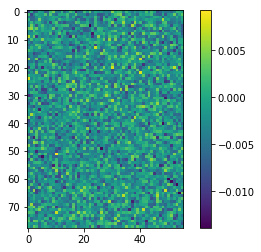

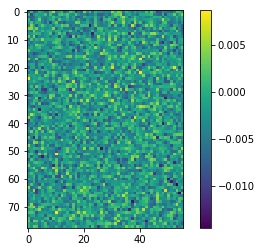

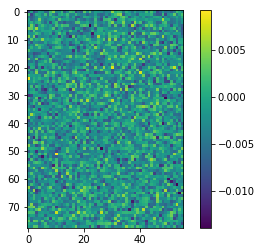

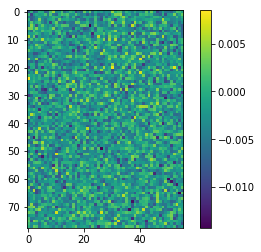

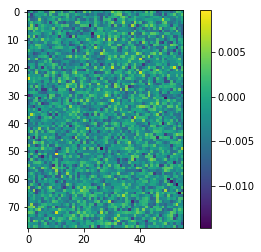

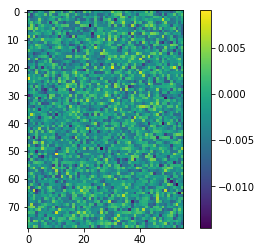

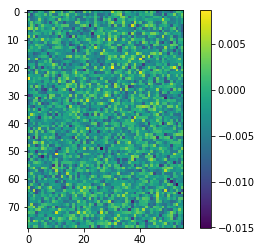

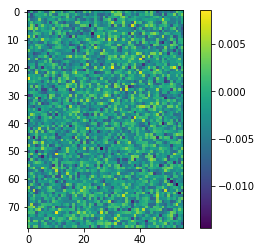

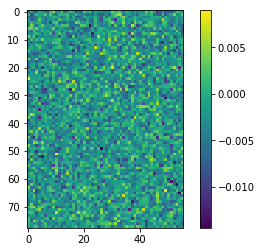

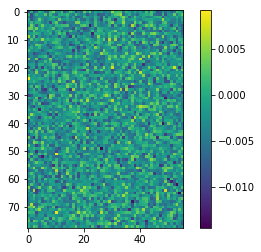

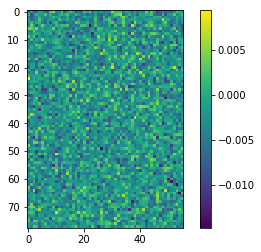

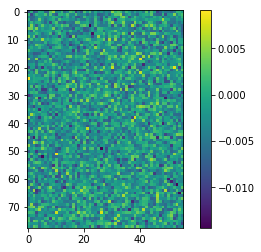

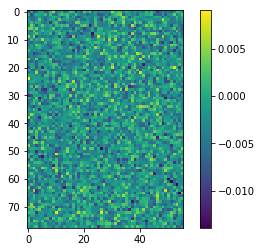

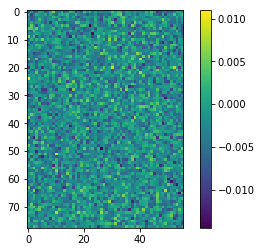

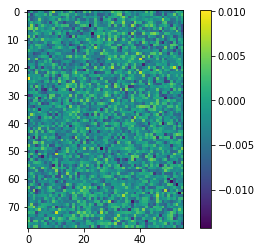

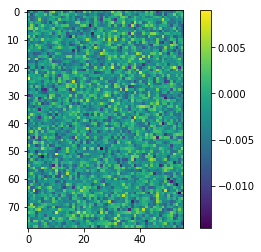

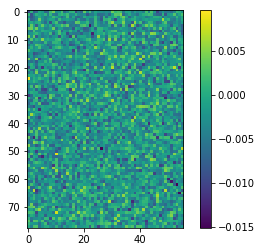

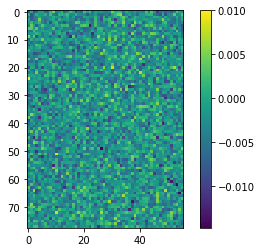

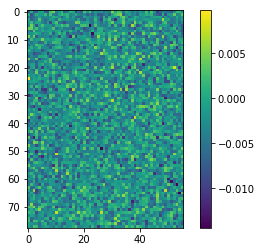

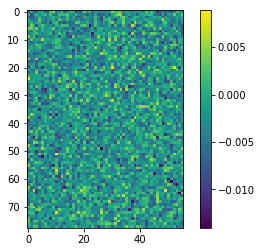

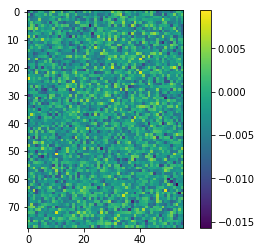

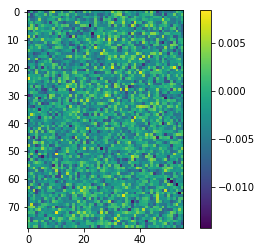

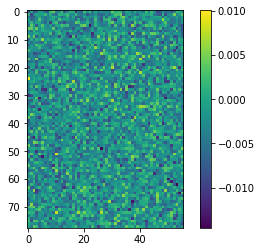

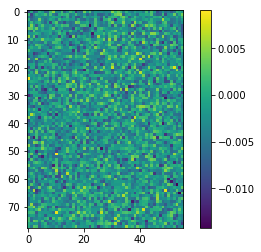

In [214]:
for i in range(500, 550):
    view_spatial_signal(dataset.iloc[:, i].values - drift(i, *popt))
    time.sleep(0.1)

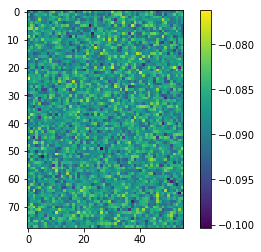

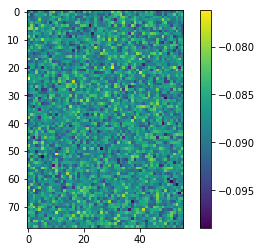

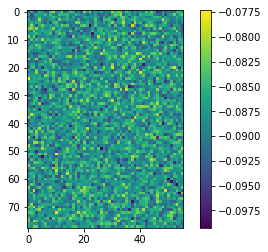

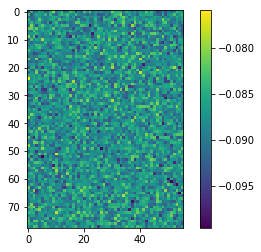

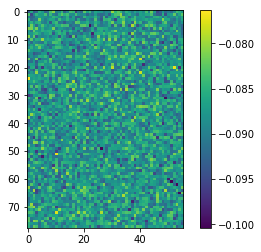

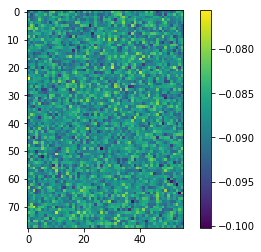

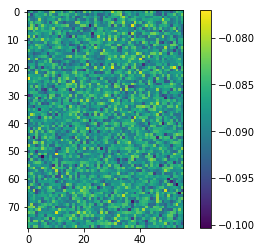

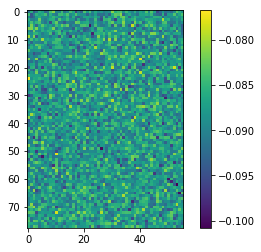

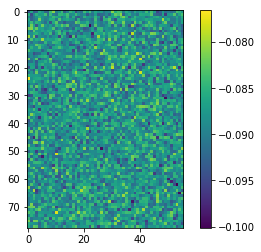

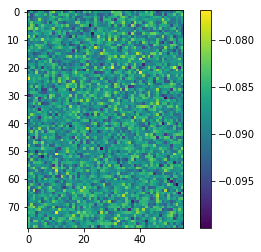

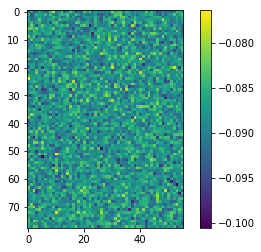

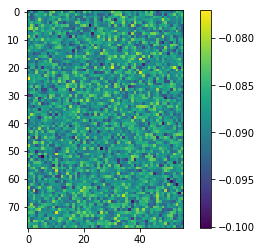

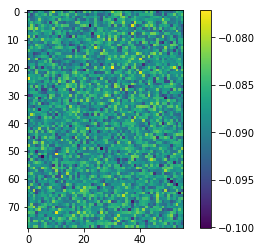

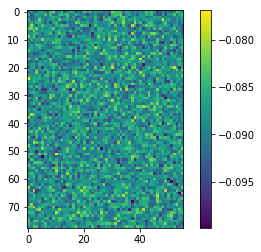

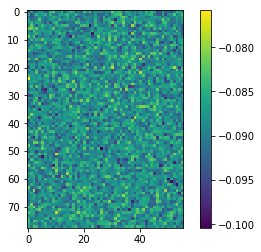

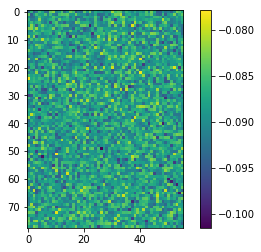

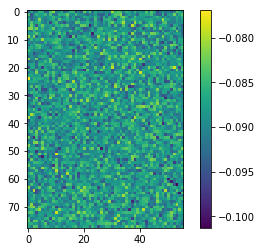

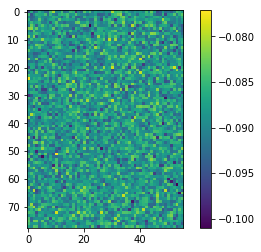

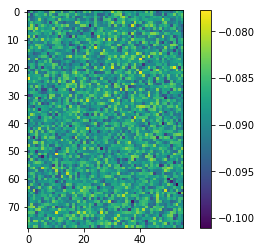

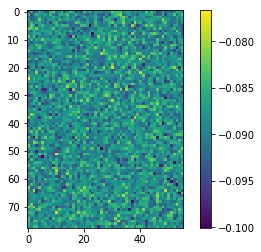

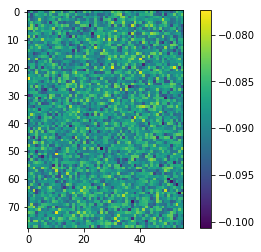

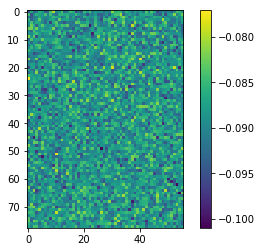

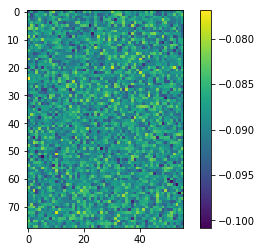

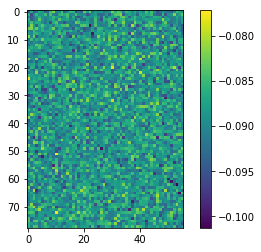

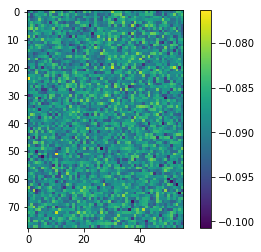

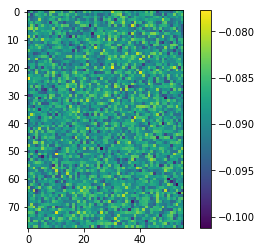

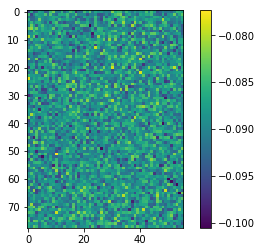

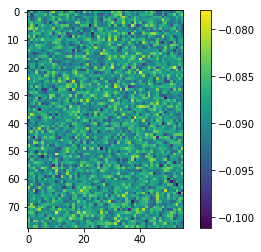

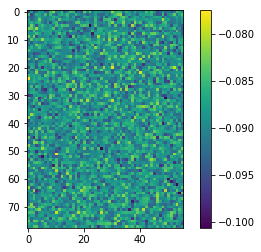

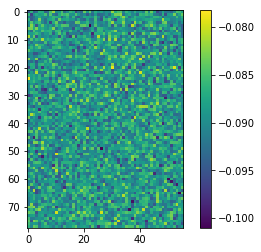

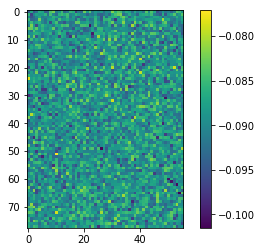

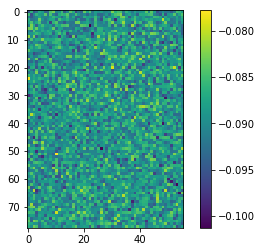

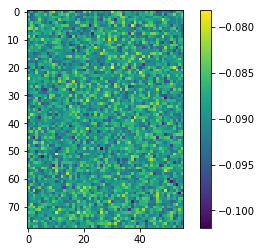

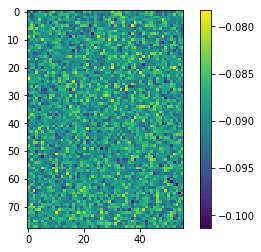

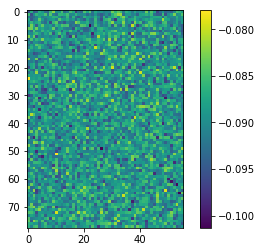

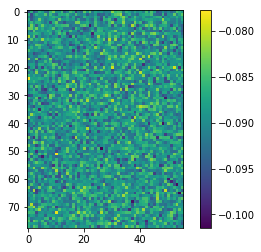

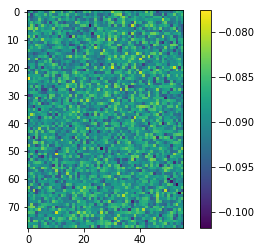

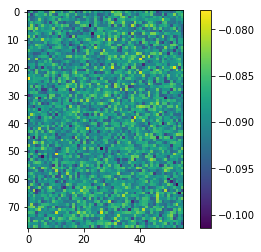

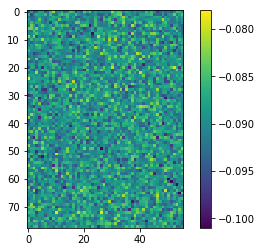

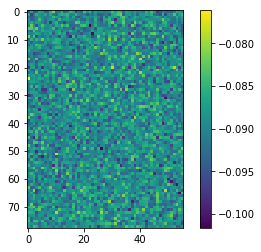

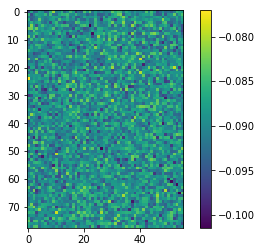

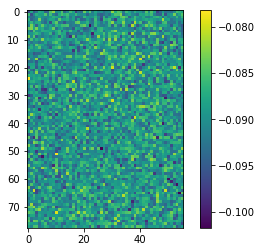

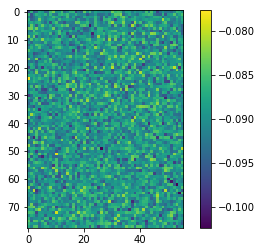

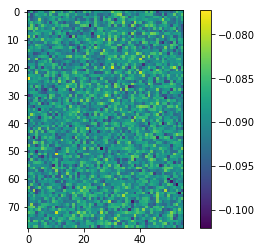

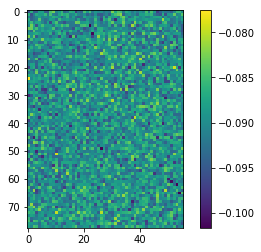

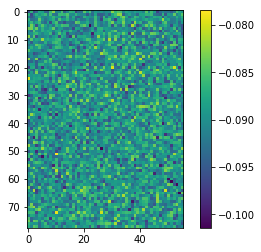

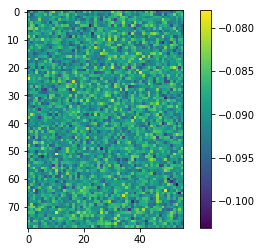

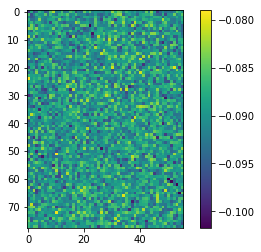

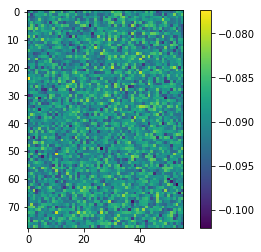

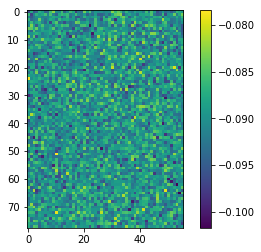

In [215]:
for i in range(500, 550):
    view_spatial_signal(dataset.iloc[:, i].values)
    time.sleep(0.1)

In [216]:
time_steps_post_prediction = np.arange(241, 2401)

In [219]:
type(dataset.iloc[:, 241:].values.T)

numpy.ndarray

In [220]:
type(drift(time_steps_post_prediction, *popt))

numpy.ndarray

In [223]:
dataset.iloc[:, 241:] - drift(time_steps_post_prediction, *popt)

241           242       243       244       245       246   \
0    -0.003702 -3.537066e-03 -0.004087 -0.003623 -0.003613 -0.004144   
1     0.002733  1.276600e-03  0.001220  0.001918  0.001600  0.002287   
2     0.001155  2.103066e-03  0.001995  0.002358  0.001958  0.002345   
3     0.001831  2.203858e-03  0.001139  0.000505  0.002352  0.001721   
4     0.001526  6.105814e-04 -0.000188  0.000323  0.000770  0.001036   
5    -0.000735 -5.757543e-04 -0.000025 -0.000070 -0.000775 -0.000194   
6     0.006992  6.609344e-03  0.006510  0.007669  0.007423  0.006144   
7     0.001563  2.287672e-04  0.000675  0.000951  0.000662  0.000274   
8     0.000501 -9.444532e-07  0.000414  0.000218  0.000874  0.000530   
9     0.005803  7.034977e-03  0.005380  0.006106  0.006109  0.005674   
10   -0.002553 -4.804462e-03 -0.004712 -0.003837 -0.004170 -0.004853   
11    0.001208  1.122893e-03  0.000049  0.001107  0.001602  0.001431   
12   -0.001488 -1.810909e-03 -0.000761 -0.002405 -0.001222 -0.002036   
13    0.001133  2.012905e-03  0.001821  0.002565  0.002446  0.001027   
14    0.004002  3.663312e-03  0.003300  0.003275  0.003477  0.003542   
15   -0.001239 -1.391175e-03 -0.002182 -0.000196 -0.001424 -0.001166   
16   -0.001796 -1.793094e-03 -0.002342 -0.001811 -0.000940 -0.002116   
17    0.005324  5.135108e-03  0.005098  0.005531  0.006038  0.006495   
18   -0.001777 -2.409537e-03 -0.001463 -0.001154 -0.001569 -0.003090   
19   -0.001736 -1.586424e-03 -0.001775 -0.000749 -0.001282 -0.001471   
20   -0.005417 -5.731987e-03 -0.004818 -0.005063 -0.005240 -0.005189   
21    0.003750  2.074364e-03  0.003460  0.003228  0.003684  0.002707   
22   -0.003162 -2.870990e-03 -0.002046 -0.001381 -0.002044 -0.002118   
23    0.004827  3.375837e-03  0.004563  0.004292  0.004506  0.004158   
24    0.008783  9.106909e-03  0.008895  0.008200  0.008763  0.007922   
25    0.001460  1.502680e-03  0.001467  0.000542  0.001080 -0.000095   
26   -0.001822 -1.943933e-03 -0.002366 -0.002880 -0.002194 -0.002544   
27    0.000132 -5.996072e-04 -0.000012  0.000466  0.000213 -0.000886   
28   -0.003200 -3.363666e-03 -0.002718 -0.002381 -0.002874 -0.003821   
29    0.001032  1.004114e-03  0.002318  0.000887  0.001186  0.000705   
...        ...           ...       ...       ...       ...       ...   
4338  0.002378  9.471735e-04  0.001985  0.001764  0.001681  0.002393   
4339  0.008012  7.289813e-03  0.007934  0.006524  0.007287  0.006574   
4340  0.000340  1.029220e-03  0.000443  0.001044  0.000985  0.000521   
4341  0.001038  2.055750e-05  0.000691  0.000996  0.001112  0.001197   
4342  0.004626  6.034678e-03  0.004960  0.004967  0.005722  0.005198   
4343 -0.000100  1.244121e-03  0.001881  0.001275 -0.000317  0.000185   
4344  0.003703  4.066649e-03  0.002642  0.004599  0.004699  0.004001   
4345  0.000567  1.064158e-03 -0.000716  0.000291  0.000793  0.000772   
4346  0.004699  5.201501e-03  0.005059  0.005622  0.005381  0.005584   
4347  0.001630  1.989527e-03  0.002879  0.002643  0.002243  0.002420   
4348  0.002041  3.284914e-03  0.003234  0.003898  0.003720  0.003909   
4349  0.002158  1.872961e-03  0.002227  0.002059  0.001730  0.002287   
4350  0.002072  3.951123e-04  0.000181  0.000687  0.000333  0.000560   
4351  0.000131 -1.694467e-03 -0.001408 -0.001180 -0.001482 -0.001674   
4352  0.001601  1.855823e-03  0.001404  0.002195  0.000757  0.001795   
4353  0.003373  4.079850e-03  0.004143  0.004201  0.003491  0.004440   
4354 -0.001721 -2.002335e-03 -0.001698 -0.002530 -0.001622 -0.001592   
4355  0.005735  5.028254e-03  0.004456  0.005304  0.006262  0.005121   
4356 -0.002270 -3.871841e-03 -0.003177 -0.002821 -0.002757 -0.002888   
4357  0.005987  4.994969e-03  0.005542  0.005919  0.006112  0.005833   
4358  0.000469 -5.299428e-06  0.001041  0.000747  0.000498 -0.000644   
4359  0.001420  1.228372e-03  0.001148  0.000415  0.000345 -0.000133   
4360  0.002478  1.359002e-03  0.001496  0.001435  0.001368  0.002157   
4361  0.002360  1.410898e-03  0.000973  0.002044  

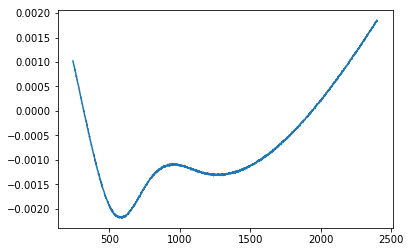

In [225]:
plt.plot(time_steps_post_prediction, (dataset.iloc[:, 241:] - drift(time_steps_post_prediction, *popt)).mean().values.T)

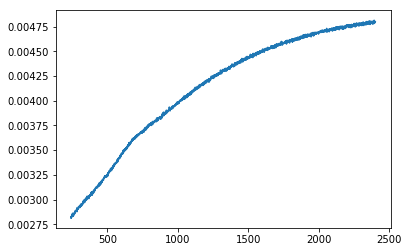

In [226]:
plt.plot(time_steps_post_prediction, (dataset.iloc[:, 241:] - drift(time_steps_post_prediction, *popt)).std().values.T)

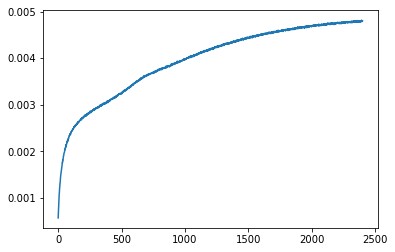

In [227]:
plt.plot(dataset.std().values)

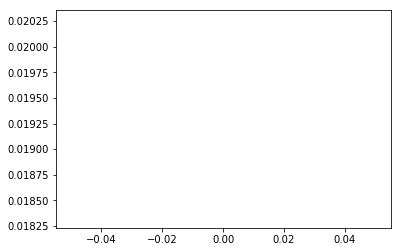

In [231]:
plt.plot(np.std(drift(np.arange(1,2401), *popt)))

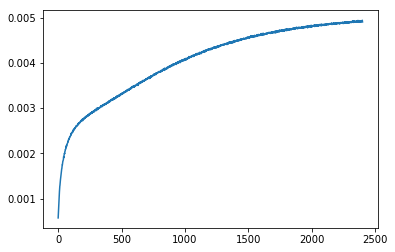

In [234]:
plt.plot(dataset_neg.std().values)

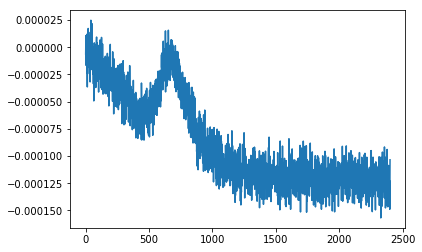

In [235]:
plt.plot(dataset.std().values-dataset_neg.std().values)

In [334]:
def return_rolling_difference(series):
    diffs = []
    for i in range(1, len(series)):
        diffs.append(series[i] - series[i-1])
    return np.array(diffs)

In [333]:
len(std_dev_diff.rolling(10).mean().dropna().values)

1892

# Method 2: model individual ISFET drift

In [1031]:
n = 300

In [1032]:
data_for_fit_pos = dataset.iloc[:, 1:n]
data_for_fit_neg = dataset_neg.iloc[:, 1:n]

In [1033]:
def drift(x,q,beta,tau):
    return (1-np.exp(((x/tau)**beta)*-1))*q

In [1034]:
time_for_fit = np.arange(n)[1:]

In [1035]:
ydata_pos = data_for_fit_pos.values
ydata_neg = data_for_fit_neg.values

In [1036]:
drift_pos = np.zeros((78*56, 2401))
drift_neg = np.zeros((78*56, 2401))

In [1037]:
all_time_steps_for_fitting = np.arange(2401)[1:]
all_time_steps_actual = np.arange(2401)
remaining_time_points = np.arange(2401)[n:]

In [1038]:
n_sensors = ydata_pos.shape[0]
for i in range(0, n_sensors):
    popt_pos,_ = curve_fit(drift, time_for_fit, ydata_pos[i,:], bounds = ((-1.5, 0, 300),(0,2,10000)))
    sensor_drift = drift(all_time_steps_for_fitting, *popt_pos)
    sensor_drift = np.append(np.nan, sensor_drift)
    drift_pos[i,:] = sensor_drift

 ...]

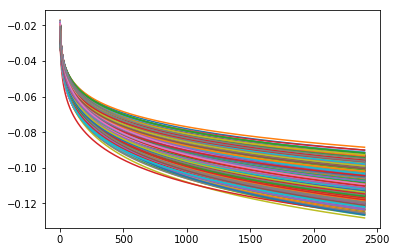

In [573]:
plt.plot(all_time_steps_actual, drift_pos.T)

In [994]:
sensor_drift.shape

(2401,)

In [1039]:
n_sensors = ydata_neg.shape[0]
for i in range(0, n_sensors):
    popt_neg,_ = curve_fit(drift, time_for_fit, ydata_neg[i,:], bounds = ((-1.5, 0, 300),(0,2,10000)))
    sensor_drift = drift(all_time_steps_for_fitting, *popt_neg)
    sensor_drift = np.append(np.nan, sensor_drift)
    drift_neg[i,:] = sensor_drift

## Drift modelled and predicted. Now subtract 

In [1040]:
pos_no_drift = dataset - drift_pos
neg_no_drift = dataset_neg - drift_neg

## How good was curve fitting?

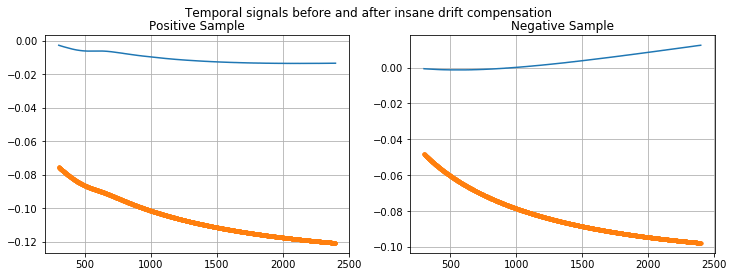

In [1041]:
fig,ax = plt.subplots(1,2, figsize=(12,4))

ax[0].plot(all_time_steps_actual[n:], pos_no_drift.iloc[:,n:].mean())
ax[0].plot(all_time_steps_actual[n:], dataset.iloc[:,n:].mean(), '.')
ax[0].set_title('Positive Sample')
ax[0].grid(which='both')

ax[1].plot(all_time_steps_actual[n:], neg_no_drift.iloc[:,n:].mean())
ax[1].plot(all_time_steps_actual[n:], dataset_neg.iloc[:,n:].mean(), '.')
ax[1].set_title('Negative Sample')
ax[1].grid(which='both')

fig.suptitle('Temporal signals before and after insane drift compensation')
plt.show()

## Compute Standard Deviations, plot difference

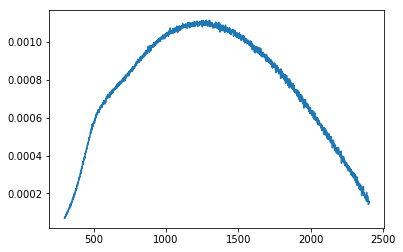

In [1042]:
std_pos_no_drift = np.std(pos_no_drift.iloc[:, n:])
std_neg_no_drift = np.std(neg_no_drift.iloc[:, n:])

std_dev_diff = std_pos_no_drift - std_neg_no_drift

plt.plot(remaining_time_points, std_dev_diff.rolling(1).mean())

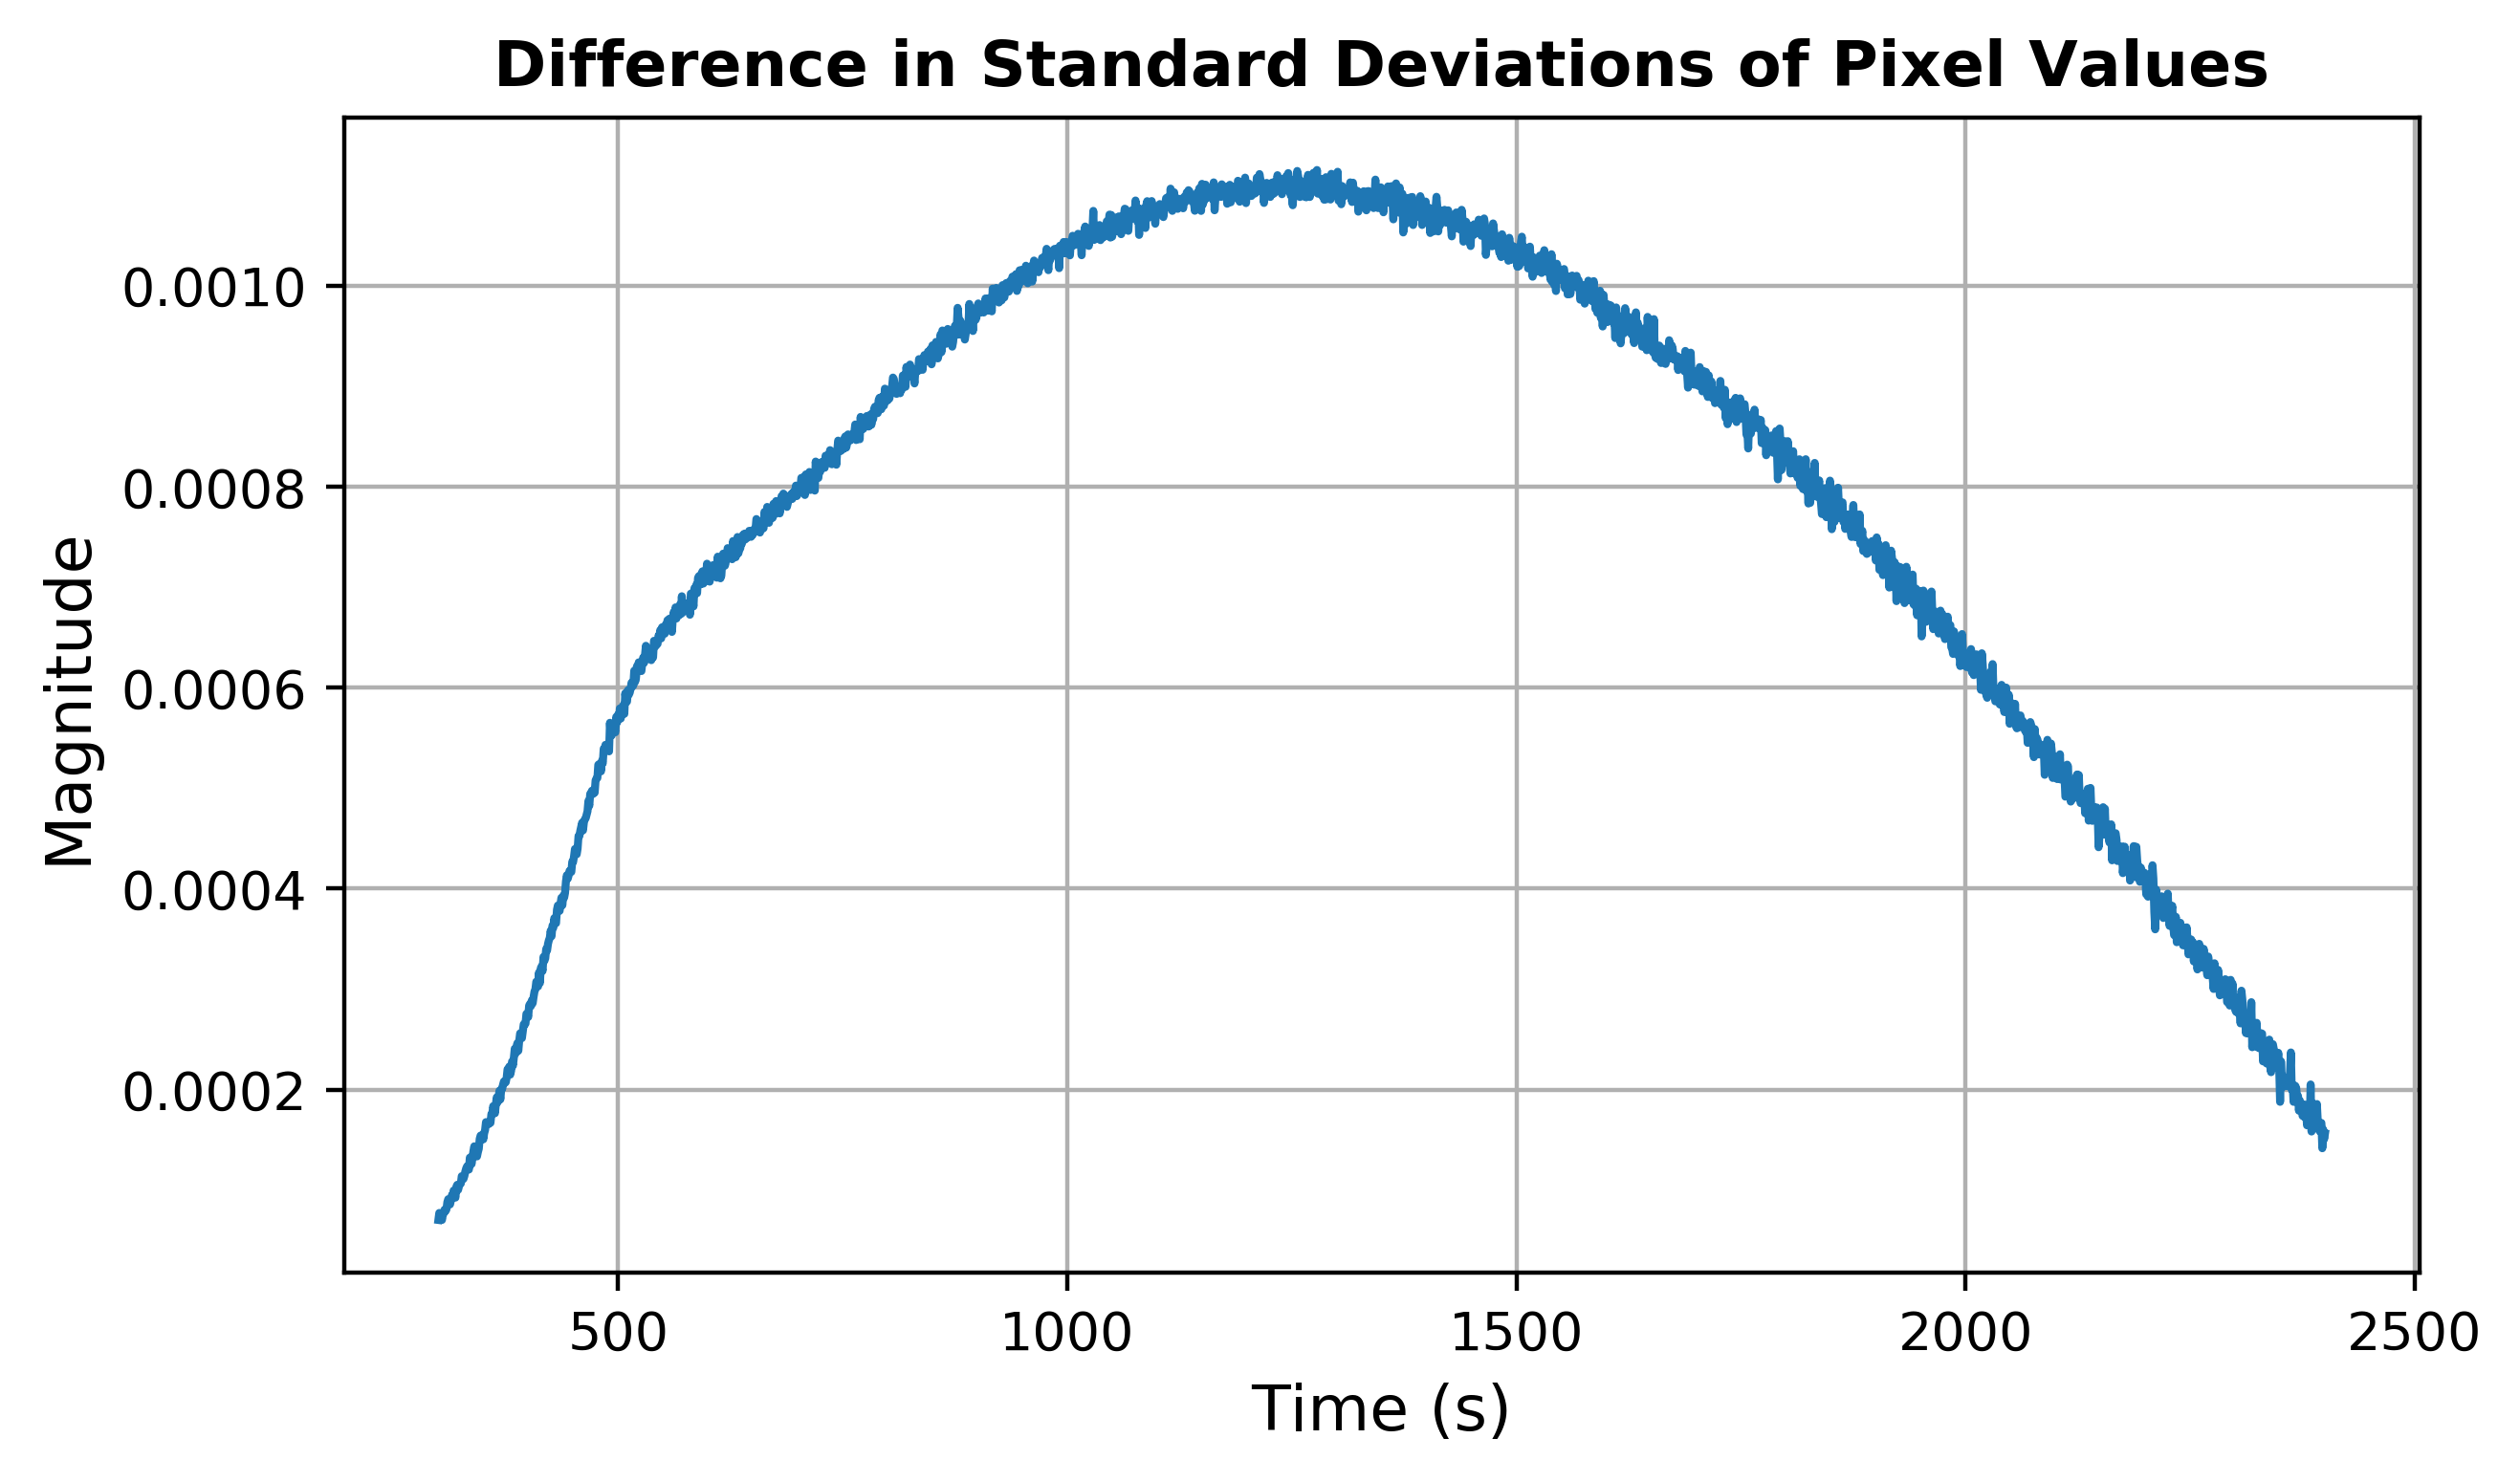

In [1044]:
plt.figure(figsize=(7,4), dpi=400)
plt.ylabel('Magnitude', fontsize=12)
plt.xlabel('Time (s)', fontsize=12)
plt.grid(which="major", linestyle="-")
plt.grid(which="minor", linestyle="--")
plt.plot(remaining_time_points, std_dev_diff)
plt.title('Difference in Standard Deviations of Pixel Values', fontweight='bold')
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.savefig('Results/algo_2_clean_diff.png', bbox_inches='tight')

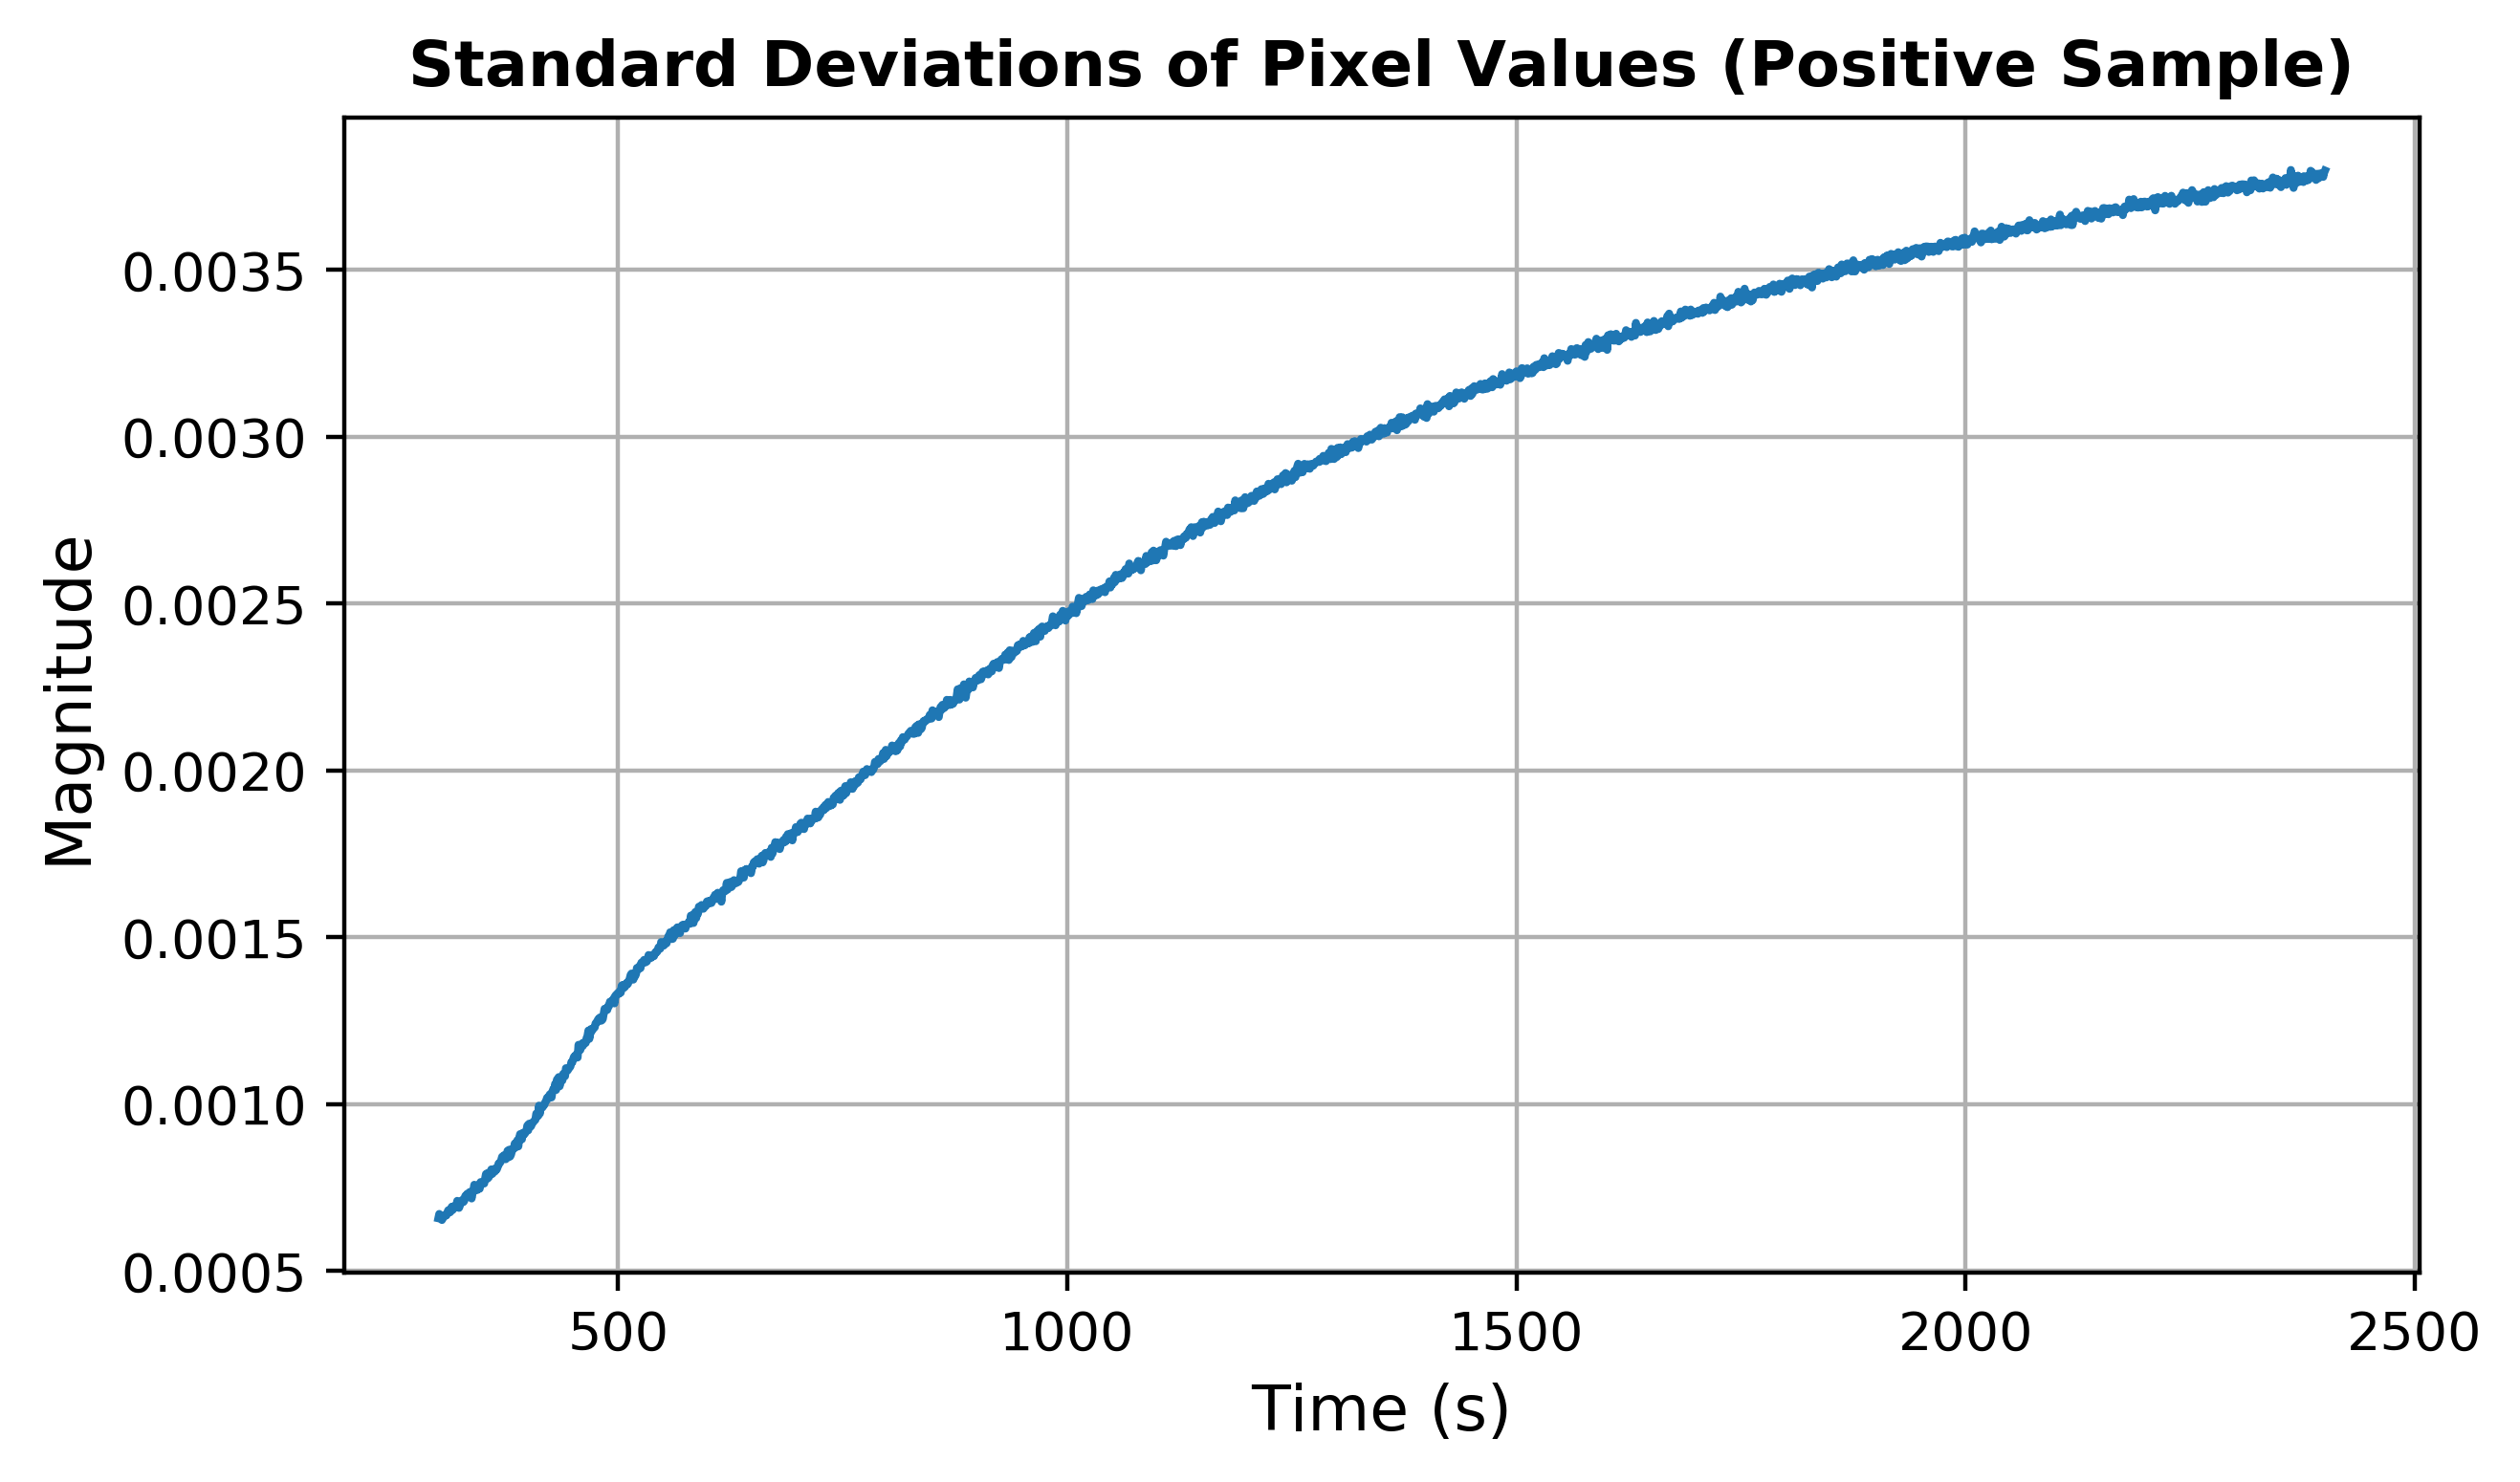

In [1048]:
plt.figure(figsize=(7,4), dpi=400)
plt.ylabel('Magnitude', fontsize=12)
plt.xlabel('Time (s)', fontsize=12)
plt.grid(which="major", linestyle="-")
plt.grid(which="minor", linestyle="--")
plt.plot(remaining_time_points, std_pos_no_drift)
plt.title('Standard Deviations of Pixel Values (Positive Sample)', fontweight='bold')
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.savefig('Results/algo_2_clean_std_pos.png', bbox_inches='tight')

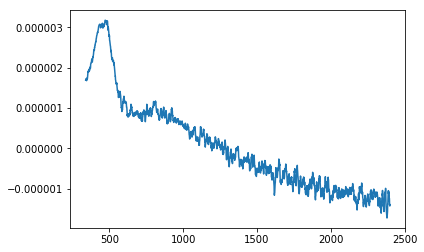

In [1051]:
ds_dt = return_rolling_difference(std_dev_diff.rolling(30).mean().dropna().values)
n_steps_lost = len(remaining_time_points) - len(ds_dt)
ds_dt = np.append(np.zeros(n_steps_lost)+np.nan, ds_dt)
ds_dt = pd.Series(ds_dt)
plt.plot(remaining_time_points, ds_dt.rolling(10).mean())

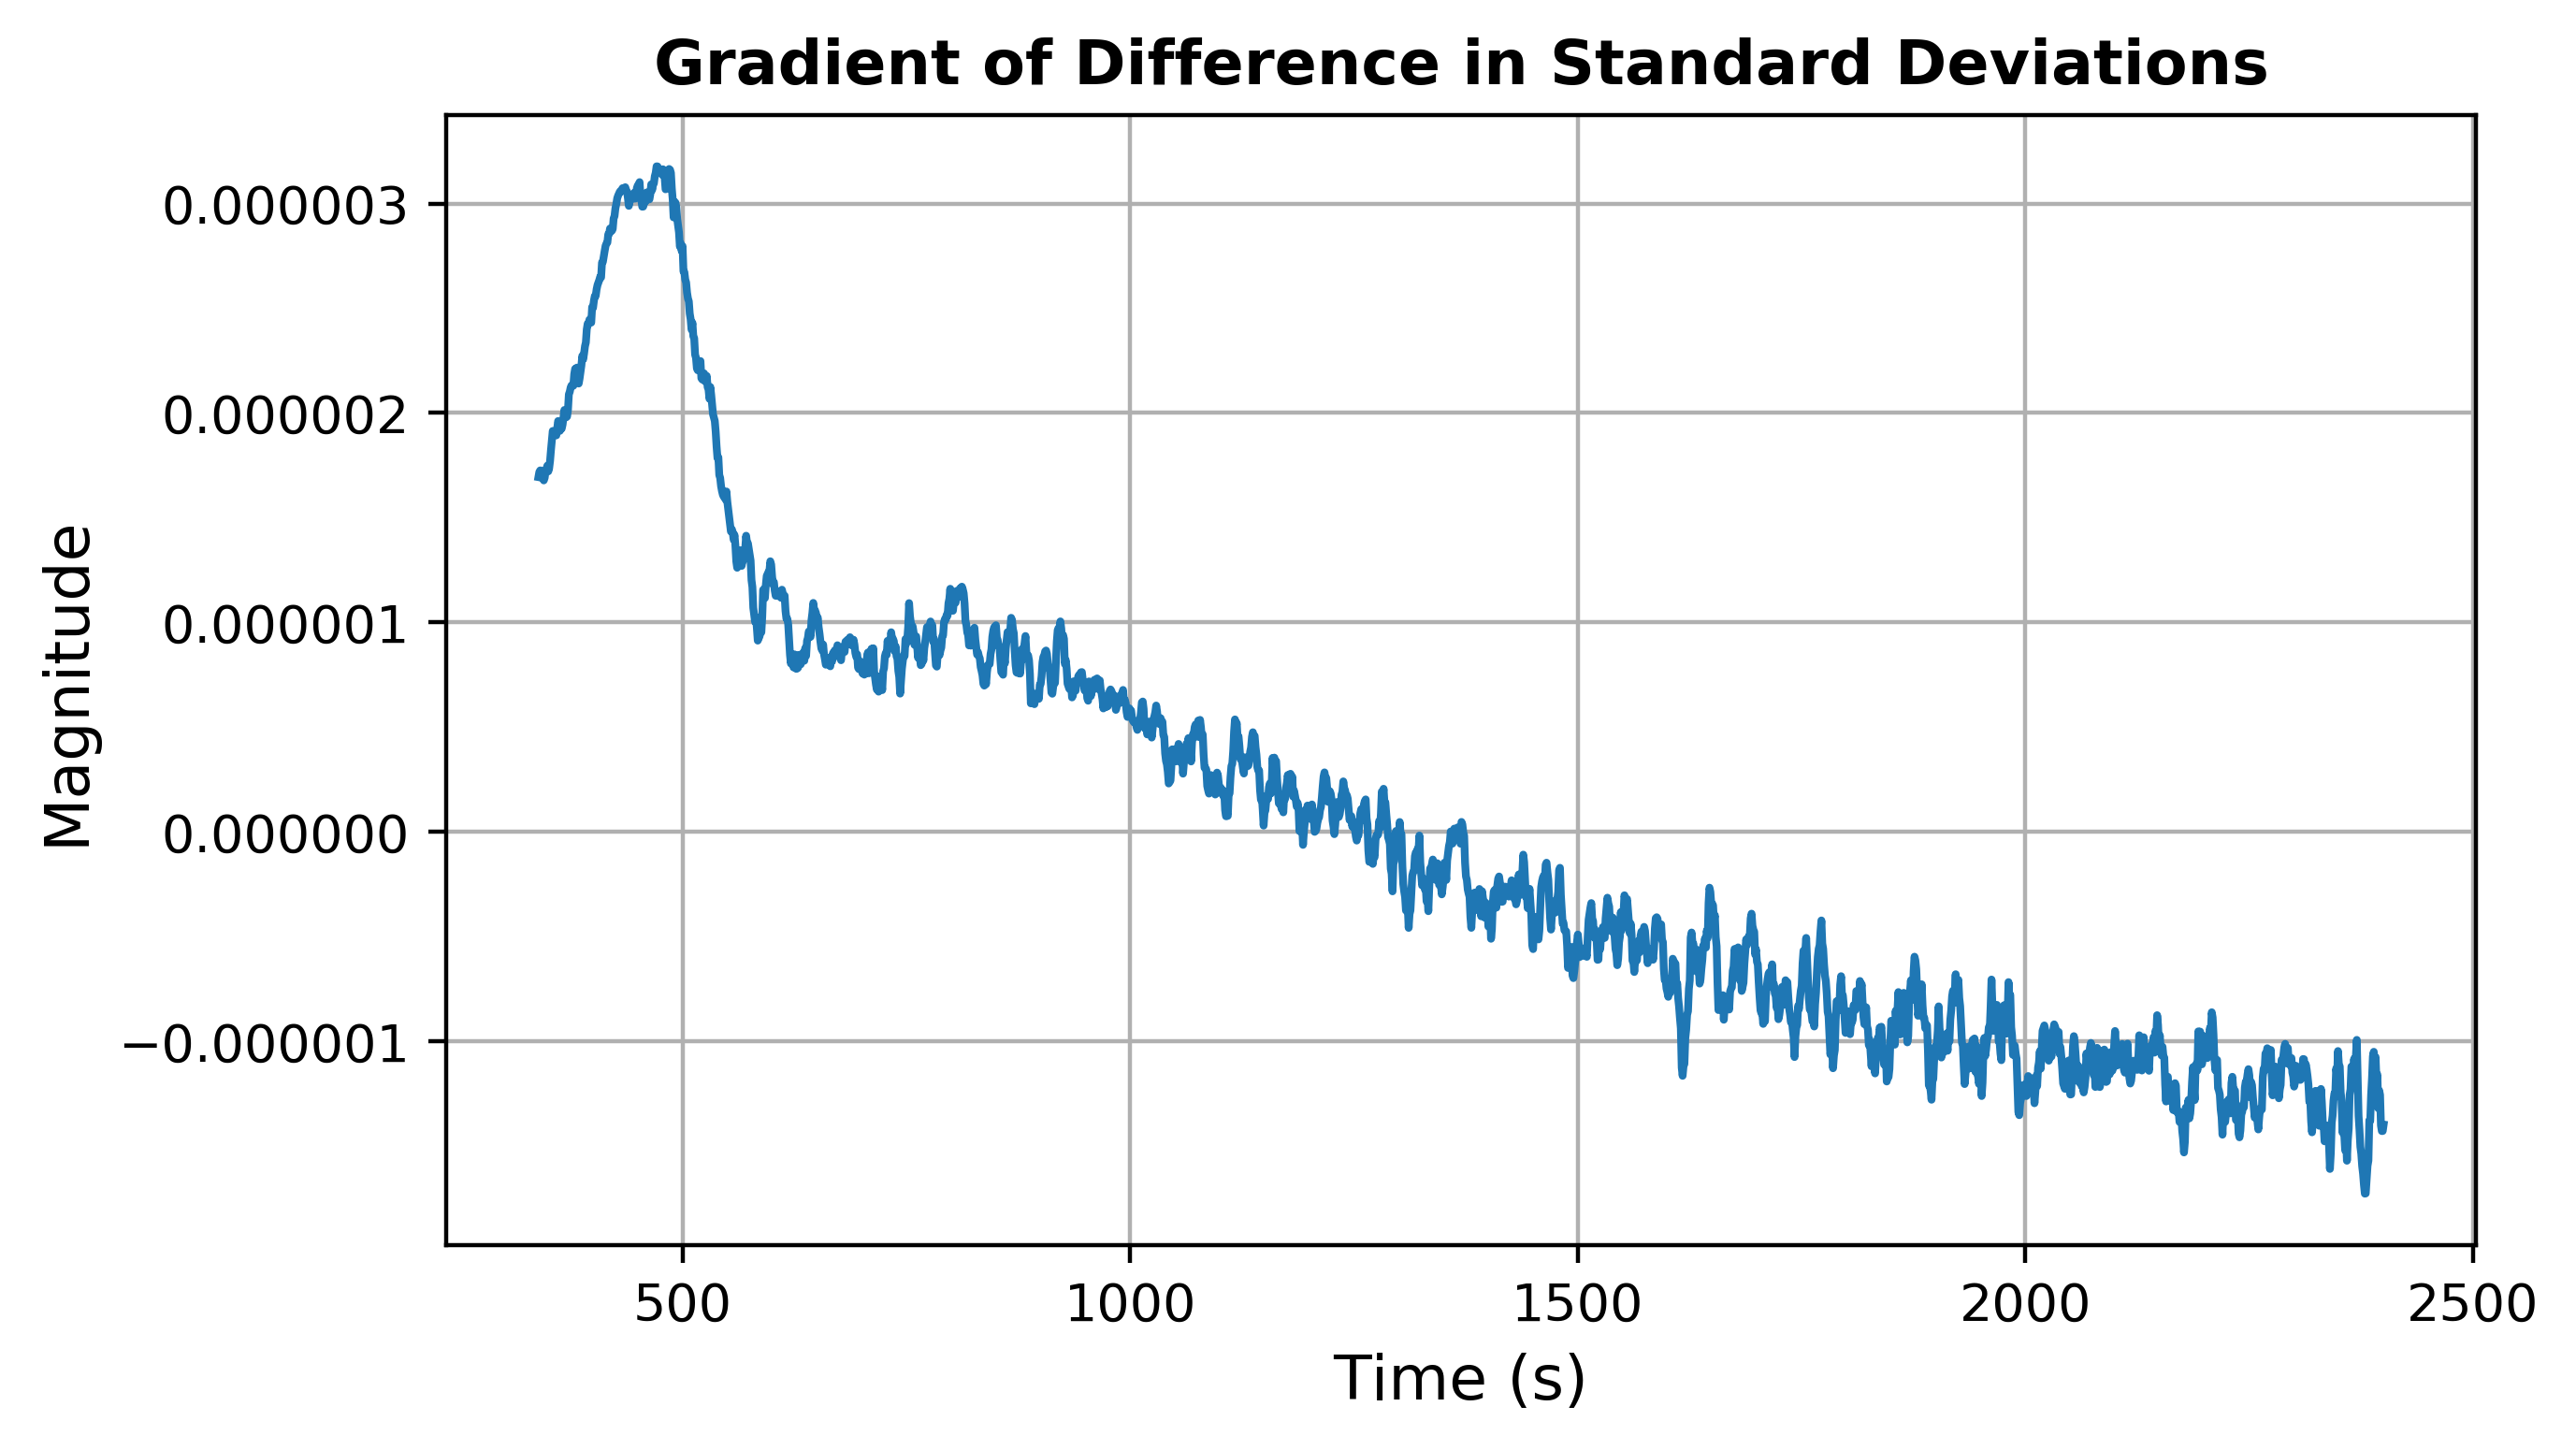

In [1052]:
plt.figure(figsize=(7,4), dpi=400)
plt.ylabel('Magnitude', fontsize=12)
plt.xlabel('Time (s)', fontsize=12)
plt.grid(which="major", linestyle="-")
plt.grid(which="minor", linestyle="--")
plt.plot(remaining_time_points, ds_dt.rolling(10).mean())
plt.title('Gradient of Difference in Standard Deviations', fontweight='bold')
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.savefig('Results/algo_2_clean_grad.png', bbox_inches='tight')

In [1055]:
peaks = find_peaks(ds_dt.rolling(30).mean(), distance = 50)
print(peaks)

(array([  68,  130,  185,  269,  322,  373,  453,  513,  569,  628,  686,
        747,  839,  890,  940, 1001, 1071, 1139, 1234, 1291, 1350, 1411,
       1472, 1522, 1582, 1682, 1740, 1796, 1847, 1910, 1989, 2070]), {})


In [583]:
ttp_spatial = n + peaks[0][0]

In [584]:
ttp_spatial

368

# Method 3: difference between frames

In [643]:
diff_frame = dataset.iloc[:,:].diff(axis=1)

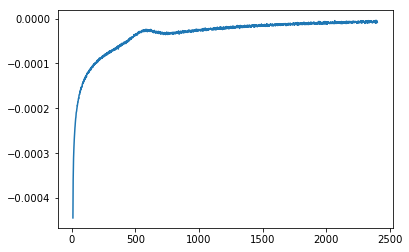

In [644]:
plt.plot(diff_frame.mean().rolling(10).mean())

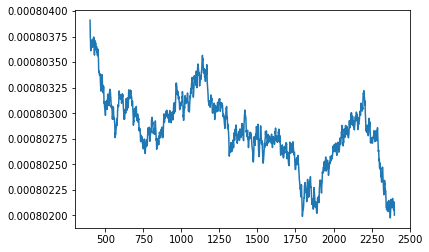

In [645]:
plt.plot(diff_frame.std().rolling(400).mean())

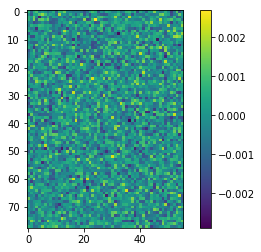

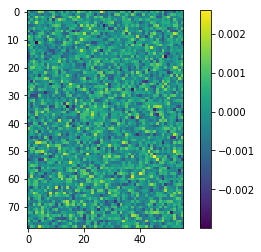

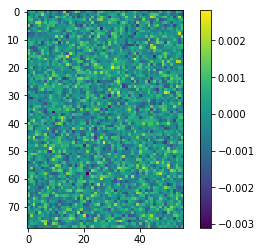

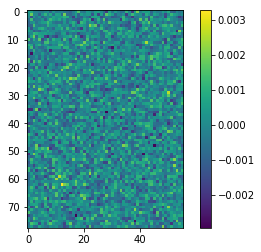

In [646]:
view_spatial_signal(diff_frame.iloc[:,350])
view_spatial_signal(diff_frame.iloc[:, 550])
view_spatial_signal(diff_frame.iloc[:, 580])
view_spatial_signal(diff_frame.iloc[:, 750])

In [647]:
diff_frame.iloc[:,350].std()

0.0008083587799694147

In [648]:
diff_frame.iloc[:,550].std()

0.0007898482867109623

In [649]:
diff_frame.iloc[:,650].std()

0.0008078104317346601

In [650]:
diff_frame.iloc[:,600].std()

0.0007952979340995198

In [651]:
def coord_to_index(x,y):
    return 78*(x) + y

In [652]:
x_indices_to_check = np.arange(1,55)
y_indices_to_check = np.arange(1,77)

In [653]:
all_coords_to_check = []
for x in x_indices_to_check:
    for y in y_indices_to_check:
        print(x,y, coord_to_index(x,y))
        all_coords_to_check.append((x,y))

1 1 79
1 2 80
1 3 81
1 4 82
1 5 83
1 6 84
1 7 85
1 8 86
1 9 87
1 10 88
1 11 89
1 12 90
1 13 91
1 14 92
1 15 93
1 16 94
1 17 95
1 18 96
1 19 97
1 20 98
1 21 99
1 22 100
1 23 101
1 24 102
1 25 103
1 26 104
1 27 105
1 28 106
1 29 107
1 30 108
1 31 109
1 32 110
1 33 111
1 34 112
1 35 113
1 36 114
1 37 115
1 38 116
1 39 117
1 40 118
1 41 119
1 42 120
1 43 121
1 44 122
1 45 123
1 46 124
1 47 125
1 48 126
1 49 127
1 50 128
1 51 129
1 52 130
1 53 131
1 54 132
1 55 133
1 56 134
1 57 135
1 58 136
1 59 137
1 60 138
1 61 139
1 62 140
1 63 141
1 64 142
1 65 143
1 66 144
1 67 145
1 68 146
1 69 147
1 70 148
1 71 149
1 72 150
1 73 151
1 74 152
1 75 153
1 76 154
2 1 157
2 2 158
2 3 159
2 4 160
2 5 161
2 6 162
2 7 163
2 8 164
2 9 165
2 10 166
2 11 167
2 12 168
2 13 169
2 14 170
2 15 171
2 16 172
2 17 173
2 18 174
2 19 175
2 20 176
2 21 177
2 22 178
2 23 179
2 24 180
2 25 181
2 26 182
2 27 183
2 28 184
2 29 185
2 30 186
2 31 187
2 32 188
2 33 189
2 34 190
2 35 191
2 36 192
2 37 193
2 38 194
2 39 195
2 40

15 41 1211
15 42 1212
15 43 1213
15 44 1214
15 45 1215
15 46 1216
15 47 1217
15 48 1218
15 49 1219
15 50 1220
15 51 1221
15 52 1222
15 53 1223
15 54 1224
15 55 1225
15 56 1226
15 57 1227
15 58 1228
15 59 1229
15 60 1230
15 61 1231
15 62 1232
15 63 1233
15 64 1234
15 65 1235
15 66 1236
15 67 1237
15 68 1238
15 69 1239
15 70 1240
15 71 1241
15 72 1242
15 73 1243
15 74 1244
15 75 1245
15 76 1246
16 1 1249
16 2 1250
16 3 1251
16 4 1252
16 5 1253
16 6 1254
16 7 1255
16 8 1256
16 9 1257
16 10 1258
16 11 1259
16 12 1260
16 13 1261
16 14 1262
16 15 1263
16 16 1264
16 17 1265
16 18 1266
16 19 1267
16 20 1268
16 21 1269
16 22 1270
16 23 1271
16 24 1272
16 25 1273
16 26 1274
16 27 1275
16 28 1276
16 29 1277
16 30 1278
16 31 1279
16 32 1280
16 33 1281
16 34 1282
16 35 1283
16 36 1284
16 37 1285
16 38 1286
16 39 1287
16 40 1288
16 41 1289
16 42 1290
16 43 1291
16 44 1292
16 45 1293
16 46 1294
16 47 1295
16 48 1296
16 49 1297
16 50 1298
16 51 1299
16 52 1300
16 53 1301
16 54 1302
16 55 1303
16 56 13

28 53 2237
28 54 2238
28 55 2239
28 56 2240
28 57 2241
28 58 2242
28 59 2243
28 60 2244
28 61 2245
28 62 2246
28 63 2247
28 64 2248
28 65 2249
28 66 2250
28 67 2251
28 68 2252
28 69 2253
28 70 2254
28 71 2255
28 72 2256
28 73 2257
28 74 2258
28 75 2259
28 76 2260
29 1 2263
29 2 2264
29 3 2265
29 4 2266
29 5 2267
29 6 2268
29 7 2269
29 8 2270
29 9 2271
29 10 2272
29 11 2273
29 12 2274
29 13 2275
29 14 2276
29 15 2277
29 16 2278
29 17 2279
29 18 2280
29 19 2281
29 20 2282
29 21 2283
29 22 2284
29 23 2285
29 24 2286
29 25 2287
29 26 2288
29 27 2289
29 28 2290
29 29 2291
29 30 2292
29 31 2293
29 32 2294
29 33 2295
29 34 2296
29 35 2297
29 36 2298
29 37 2299
29 38 2300
29 39 2301
29 40 2302
29 41 2303
29 42 2304
29 43 2305
29 44 2306
29 45 2307
29 46 2308
29 47 2309
29 48 2310
29 49 2311
29 50 2312
29 51 2313
29 52 2314
29 53 2315
29 54 2316
29 55 2317
29 56 2318
29 57 2319
29 58 2320
29 59 2321
29 60 2322
29 61 2323
29 62 2324
29 63 2325
29 64 2326
29 65 2327
29 66 2328
29 67 2329
29 68 23

41 64 3262
41 65 3263
41 66 3264
41 67 3265
41 68 3266
41 69 3267
41 70 3268
41 71 3269
41 72 3270
41 73 3271
41 74 3272
41 75 3273
41 76 3274
42 1 3277
42 2 3278
42 3 3279
42 4 3280
42 5 3281
42 6 3282
42 7 3283
42 8 3284
42 9 3285
42 10 3286
42 11 3287
42 12 3288
42 13 3289
42 14 3290
42 15 3291
42 16 3292
42 17 3293
42 18 3294
42 19 3295
42 20 3296
42 21 3297
42 22 3298
42 23 3299
42 24 3300
42 25 3301
42 26 3302
42 27 3303
42 28 3304
42 29 3305
42 30 3306
42 31 3307
42 32 3308
42 33 3309
42 34 3310
42 35 3311
42 36 3312
42 37 3313
42 38 3314
42 39 3315
42 40 3316
42 41 3317
42 42 3318
42 43 3319
42 44 3320
42 45 3321
42 46 3322
42 47 3323
42 48 3324
42 49 3325
42 50 3326
42 51 3327
42 52 3328
42 53 3329
42 54 3330
42 55 3331
42 56 3332
42 57 3333
42 58 3334
42 59 3335
42 60 3336
42 61 3337
42 62 3338
42 63 3339
42 64 3340
42 65 3341
42 66 3342
42 67 3343
42 68 3344
42 69 3345
42 70 3346
42 71 3347
42 72 3348
42 73 3349
42 74 3350
42 75 3351
42 76 3352
43 1 3355
43 2 3356
43 3 3357


In [654]:
def get_neighbouring_coords(neighborhood_size, x,y):
    num_to_look = math.floor(neighborhood_size/2)
    x_range = np.arange(x-num_to_look, x+num_to_look+1)
    y_range = np.arange(y-num_to_look, y+num_to_look+1)
    coords = []
    for x_check in x_range:
        for y_check in y_range:
            if x_check != x or y_check!=y:
                coords.append((x_check, y_check))
    return coords

In [655]:
neighbourhood_size = 3
get_neighbouring_coords(neighbourhood_size, 1,1)

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1), (2, 2)]

In [711]:
from scipy.stats.stats import pearsonr
def get_correlation(coord_1, coord_2, voltages, current_frame, horizon):
    index_1 = coord_to_index(coord_1[0], coord_1[1])
    index_2 = coord_to_index(coord_2[0], coord_2[1])
    coord_1_history = voltages.iloc[index_1, current_frame-horizon:current_frame].dropna().values
    coord_2_history = voltages.iloc[index_2, current_frame-horizon:current_frame].dropna().values
    #print(coord_1_history)
    corr = pearsonr(coord_1_history, coord_2_history)
    return corr[0]

In [657]:
get_correlation((9,54),(9,55), diff_frame, 400, 5)

-0.7441938243936599

In [658]:
all_coords_to_check

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (1, 21),
 (1, 22),
 (1, 23),
 (1, 24),
 (1, 25),
 (1, 26),
 (1, 27),
 (1, 28),
 (1, 29),
 (1, 30),
 (1, 31),
 (1, 32),
 (1, 33),
 (1, 34),
 (1, 35),
 (1, 36),
 (1, 37),
 (1, 38),
 (1, 39),
 (1, 40),
 (1, 41),
 (1, 42),
 (1, 43),
 (1, 44),
 (1, 45),
 (1, 46),
 (1, 47),
 (1, 48),
 (1, 49),
 (1, 50),
 (1, 51),
 (1, 52),
 (1, 53),
 (1, 54),
 (1, 55),
 (1, 56),
 (1, 57),
 (1, 58),
 (1, 59),
 (1, 60),
 (1, 61),
 (1, 62),
 (1, 63),
 (1, 64),
 (1, 65),
 (1, 66),
 (1, 67),
 (1, 68),
 (1, 69),
 (1, 70),
 (1, 71),
 (1, 72),
 (1, 73),
 (1, 74),
 (1, 75),
 (1, 76),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (2, 16),
 (2, 17),
 (2, 18),
 (2, 19),
 (2, 20),
 (2, 21),
 (2, 22),
 (2, 23),
 (2, 24),
 (2, 25),
 (2, 26)

In [703]:
horizon = 5
correlation_times = np.arange(2401)[horizon:]
correlations = np.zeros((56*78, len(correlation_times)))

In [727]:
for t in range(400, 401):
    print(t)
    cache = {}
    for coord in all_coords_to_check:
        total_corr = 0
        for neighbor in get_neighbouring_coords(neighbourhood_size, coord[0], coord[1]):
            if str((coord, neighbor)) not in cache or str((neighbor,coord)) not in cache:
                corr = get_correlation(coord, neighbor, diff_frame, t, horizon)
                #print(corr)
                cache[str((coord, neighbor))] = corr
                total_corr += corr
            else:
                corr = cache[str((coord, neighbor))]
                total_corr += corr
        total_corr/=8
        #print(total_corr)
        correlations[coord_to_index(coord[0], coord[1]),t] = total_corr

400


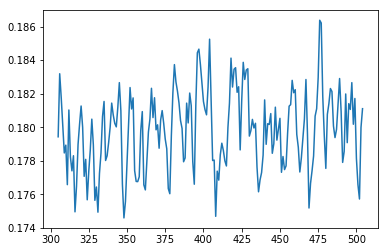

In [728]:
plt.plot(correlation_times[300:500], np.std(correlations[:,300:500], axis=0))

In [685]:
correlations[1,2]=0

In [692]:
correlations[:,3][2]

0.0

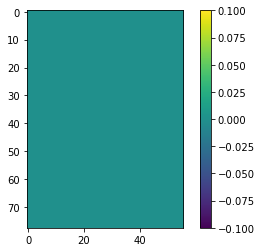

In [719]:
view_spatial_signal(correlations[:,500])

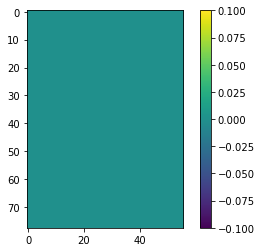

In [720]:
view_spatial_signal(correlations[:,400])

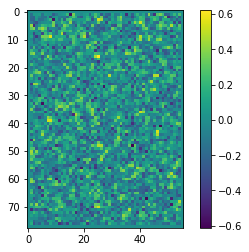

In [721]:
view_spatial_signal(correlations[:,350])

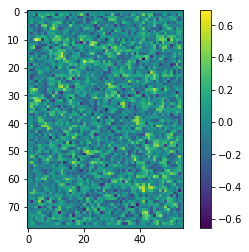

In [722]:
view_spatial_signal(correlations[:,300])

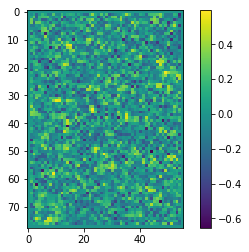

In [723]:
view_spatial_signal(correlations[:,399])